# Análise dos Nascidos Vivos entre 2014 e 2023 (10 anos)

### Passos Iniciais

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote está instalado
# <> o símbolo % é para executar no bash
%pip show pycaret

In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 743.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
# <> ------------------------------------------------------
# <> Se o pacote não tiver instalado
# <> executar o comando abaixo
%pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote foi instalado
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
# <> -----------------------------------------------------
# Lendo as bibliotecas necessárias

# <> Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# <> Biliotecas para manipulação com dados
import pandas as pd
import numpy as np

In [ ]:
# <> -----------------------------
# <> Bibliotecas dos algoritmos

from pycaret.classification import *
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report


### Etapa 1 - Pré-processamento


In [ ]:
# lendo a base de dados de Pernambuco
sinasc_2014_2023_pe = pd.read_csv('/content/sinasc_2014_2023_pe.csv', sep=",")

In [ ]:
# Conferindo o tamanho da base
sinasc_2014_2023_pe.shape

(1326944, 63)

In [ ]:
# Visualizando o cabeçalho da base
sinasc_2014_2023_pe.head(10)

,CONTADOR,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,ANO,CODUFNASC
0,5,1,2429438.0,260010,1,30,2.0,4.0,NaN,0.0,0.0,270430,NaN,1.0,2.0,4.0,21052014,915.0,F,7.0,10.0,1.0,3225.0,2.0,9062014.0,NaN,20140024.0,3.2.01,10062014.0,20.0,NaN,826.0,261460.0,26.0,3.0,3.0,21081983.0,1.0,0.0,0.0,0.0,38.0,NaN,NaN,NaN,9.0,1.0,2.0,2.0,NaN,1.0,5.0,0.0,21052014.0,6.0,0.0,0.0,NaN,6,0,5,2014,26
1,6,1,NaN,260050,3,40,1.0,3.0,621005.0,3.0,1.0,270920,NaN,1.0,1.0,1.0,25042014,830.0,F,NaN,NaN,4.0,1620.0,2.0,28042014.0,NaN,20140018.0,3.2.01,30042014.0,5.0,NaN,826.0,260050.0,26.0,2.0,7.0,19051973.0,4.0,4.0,3.0,0.0,28.0,NaN,NaN,NaN,0.0,99.0,1.0,2.0,NaN,9.0,2.0,3.0,25042014.0,3.0,0.0,0.0,NaN,11,1,1,2014,26
2,7,1,2551764.0,260120,1,23,1.0,4.0,621005.0,0.0,0.0,270240,5.0,1.0,2.0,3.0,6032014,1345.0,M,8.0,9.0,4.0,4305.0,2.0,10032014.0,NaN,20140010.0,3.2.01,13032014.0,7.0,NaN,826.0,260915.0,26.0,2.0,8.0,29111990.0,4.0,0.0,0.0,0.0,23.0,15062013.0,37.0,8.0,4.0,3.0,1.0,2.0,2.0,1.0,5.0,4.0,6032014.0,4.0,0.0,0.0,NaN,1,0,3,2014,26
3,8,1,2551764.0,260120,1,17,5.0,4.0,621005.0,0.0,0.0,270160,5.0,1.0,2.0,4.0,2032014,2300.0,M,8.0,9.0,4.0,3660.0,2.0,11032014.0,NaN,20140010.0,3.2.01,13032014.0,11.0,NaN,826.0,260750.0,26.0,2.0,8.0,5051996.0,4.0,0.0,0.0,0.0,22.0,NaN,37.0,NaN,7.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,3032014.0,4.0,0.0,0.0,NaN,1,0,5,2014,26
4,9,1,2551764.0,260120,1,17,1.0,3.0,621005.0,0.0,0.0,270160,NaN,1.0,1.0,1.0,2052014,830.0,M,8.0,9.0,4.0,2565.0,2.0,16052014.0,NaN,20140017.0,3.2.01,22052014.0,20.0,NaN,826.0,260750.0,26.0,2.0,5.0,9081996.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,5.0,4.0,2052014.0,3.0,0.0,0.0,NaN,11,0,9,2014,26
5,10,1,2499975.0,260140,1,25,1.0,3.0,999992.0,2.0,0.0,270450,5.0,1.0,1.0,3.0,24012014,2327.0,F,9.0,10.0,4.0,3245.0,2.0,7032014.0,NaN,20140011.0,3.2.01,12032014.0,47.0,NaN,826.0,260140.0,26.0,2.0,NaN,6041988.0,4.0,2.0,2.0,0.0,NaN,17042013.0,40.0,8.0,6.0,5.0,1.0,2.0,NaN,1.0,5.0,4.0,25012014.0,11.0,0.0,0.0,NaN,3,1,2,2014,26
6,11,1,2499975.0,260140,1,19,1.0,4.0,999992.0,0.0,0.0,270450,4.0,1.0,1.0,4.0,27012014,1300.0,F,NaN,NaN,4.0,3570.0,2.0,7032014.0,NaN,20140011.0,3.2.01,12032014.0,44.0,NaN,827.0,270450.0,27.0,2.0,8.0,1021994.0,4.0,0.0,0.0,0.0,NaN,19052013.0,35.0,8.0,7.0,2.0,1.0,2.0,NaN,1.0,5.0,4.0,27012014.0,4.0,0.0,0.0,NaN,10,0,5,2014,26
7,12,1,2499975.0,260140,1,18,1.0,4.0,999992.0,1.0,0.0,270360,5.0,1.0,2.0,4.0,3022014,1310.0,F,9.0,10.0,4.0,3130.0,2.0,20032014.0,NaN,20140013.0,3.2.01,26032014.0,51.0,NaN,826.0,261190.0,26.0,3.0,3.0,13011996.0,4.0,1.0,0.0,1.0,NaN,9052013.0,38.0,8.0,7.0,3.0,1.0,2.0,2.0,1.0,5.0,4.0,3022014.0,6.0,0.0,0.0,NaN,5,1,5,2014,26
8,13,1,2499975.0,260140,1,31,1.0,4.0,999992.0,3.0,1.0,270450,5.0,1.0,1.0,4.0,10022014,1130.0,F,9.0,10.0,4.0,3510.0,2.0,31032014.0,NaN,20140014.0,3.2.01,3042014.0,52.0,NaN,826.0,260140.0,26.0,2.0,8.0,26051982.0,4.0,4.0,3.0,0.0,NaN,27042013.0,40.0,8.0,7.0,2.0,1.0,2.0,NaN,1.0,5.0,4.0,10022014.0,4.0,0.0,0.0,NaN,3,1,5,2014,26
9,14,1,2499975.0,260140,1,16,1.0,4.0,999992.0,1.0,0.0,270360,4.0,1.0,2.0,2.0,20032014,1000.0,F,9.0,10.0,4.0,3965.0,2.0,9042014.0,NaN,20140016.0,3.2.01,16042014.0,27.0,NaN,827.0,270730.0,27.0,3.0,1.0,29101997.0,4.0,1.0,1.0,0.0,NaN,25072013.0,34.0,8.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,4.0,20032014.0,5.0,0.0,0.0,NaN,7,1,3,2014,26


In [ ]:
# Listar todas as colunas e seus tipos

# Exibir todas as colunas sem truncar a saída
pd.set_option('display.max_rows', None)

# Listar as colunas e seus tipos
print(sinasc_2014_2023_pe.dtypes)

# Resetar a opção para evitar alterações no ambiente
pd.reset_option('display.max_rows')


CONTADOR        int64
ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
ESTCIVMAE     float64
ESCMAE        float64
CODOCUPMAE    float64
QTDFILVIVO    float64
QTDFILMORT    float64
CODMUNRES       int64
GESTACAO      float64
GRAVIDEZ      float64
PARTO         float64
CONSULTAS     float64
DTNASC          int64
HORANASC      float64
SEXO           object
APGAR1        float64
APGAR5        float64
RACACOR       float64
PESO          float64
IDANOMAL      float64
DTCADASTRO    float64
CODANOMAL      object
NUMEROLOTE    float64
VERSAOSIST     object
DTRECEBIM     float64
DIFDATA       float64
DTRECORIGA    float64
NATURALMAE    float64
CODMUNNATU    float64
CODUFNATU     float64
ESCMAE2010    float64
SERIESCMAE    float64
DTNASCMAE     float64
RACACORMAE    float64
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
IDADEPAI      float64
DTULTMENST    float64
SEMAGESTAC    float64
TPMETESTIM    float64
CONSPRENAT

In [ ]:
# Conferindo se todas as observações são referentes a Pernambuco (COD = 26)
sinasc_2014_2023_pe['CODUFNASC'].value_counts()

,count
CODUFNASC,
26,1326944


- Excluir as linhas que não tenham informação sobre a duração da gravidez

In [ ]:
# Verificar a quantidade de valores ausentes em SEMAGESTAC e GESTACAO
valores_nulos = {
    "SEMAGESTAC ausentes": sinasc_2014_2023_pe['SEMAGESTAC'].isna().sum(),
    "GESTACAO ausentes": sinasc_2014_2023_pe['GESTACAO'].isna().sum()
}

# Contar linhas onde SEMAGESTAC está preenchido e GESTACAO está ausente
inconsistencias = sinasc_2014_2023_pe[(sinasc_2014_2023_pe['SEMAGESTAC'].notna()) &
                                      (sinasc_2014_2023_pe['GESTACAO'].isna())].shape[0]

# Exibir os resultados
valores_nulos, inconsistencias


({'SEMAGESTAC ausentes': 26336, 'GESTACAO ausentes': 26209}, 0)

In [ ]:
# Excluir as linhas que não houver informação das semanas de gestação

sinasc_2014_2023_pe = sinasc_2014_2023_pe.dropna(subset=['GESTACAO'])

sinasc_2014_2023_pe.shape

(1300735, 63)

In [ ]:
# Contar quantas linhas possuem o valor '9' na coluna 'GESTACAO'
(sinasc_2014_2023_pe['GESTACAO'] == 9).sum()

89

In [ ]:
# Contar as ocorrências de SEMAGESTAC apenas para os casos onde GESTACAO == 9
if 'GESTACAO' in sinasc_2014_2023_pe.columns and 'SEMAGESTAC' in sinasc_2014_2023_pe.columns:
    contagem_semagestac = sinasc_2014_2023_pe.loc[sinasc_2014_2023_pe['GESTACAO'] == 9, 'SEMAGESTAC'].value_counts()

contagem_semagestac

,count
SEMAGESTAC,


In [ ]:
# Excluir as linhas que possuem o valor '9' na coluna 'GESTACAO',
# visto que não conseguimos informação na coluna 'SEMAGESTAC'

sinasc_2014_2023_pe = sinasc_2014_2023_pe[sinasc_2014_2023_pe['GESTACAO'] != 9]

In [ ]:
sinasc_2014_2023_pe.shape

(1300646, 63)

 - Criar a variável target que define se o nascido foi prematuro ou não

In [ ]:
# Criando a variável target

# Criar nova coluna para definir se o bebe é prematuro ou não, a partir da coluna 'GESTACAO'
# Abaixo de 37 semanas é considerado prematuro

# Respostas em 'GESTACAO':
# Semanas de gestação: 1– Menos de 22 semanas; 2– 22 a 27 semanas; 3– 28 a 31 semanas; 4– 32 a 36 semanas; 5– 37 a 41 semanas; 6– 42 semanas e mais; 9– Ignorado.

sinasc_2014_2023_pe["PREMATURO"] = sinasc_2014_2023_pe["GESTACAO"].replace({
    1: 1, 2: 1, 3: 1, 4: 1,  # Prematuros
    5: 0, 6: 0               # Não prematuros
})

# Transformando variavel em object
sinasc_2014_2023_pe['PREMATURO'] = sinasc_2014_2023_pe['PREMATURO'].astype('object')

- Seleção de variáveis de interesse para análise

In [ ]:
# Selecionar colunas para evitar explosão dimensional

selected_features = ['ANO', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
                      'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'SEXO',
                     'RACACOR', 'PESO', 'IDANOMAL', 'RACACORMAE','QTDGESTANT', 'QTDPARTNOR',
                     'QTDPARTCES','MESPRENAT', 'TPAPRESENT', 'STTRABPART','PREMATURO'
                     ]

sinasc_2014_2023_pe_selected = sinasc_2014_2023_pe[selected_features]


    - ANO: Ano de nascimento do nascido

    - LOCNASC: Local de nascimento: 1 – Hospital; 2 – Outros estabelecimentos de saúde; 3 – Domicílio; 4 – Outros; 5- Aldeia Indígena.

    - IDADEMAE:  Idade da mãe

    - ESTCIVMAE:  Situação conjugal da mãe: 1– Solteira; 2– Casada; 3– Viúva; 4- Separada judicialmente/divorciada; 5– União estável; 9– Ignorada.

    - ESCMAE: Escolaridade, em anos de estudo concluídos: 1 – Nenhuma; 2 – 1 a 3 anos; 3 – 4 a 7 anos; 4 – 8 a 11 anos; 5 – 12 e mais; 9 – Ignorado.

    - QTDFILVIVO: Número de filhos vivos

    - QTDFILMORT: Número de perdas fetais e abortos

    - GESTACAO:  Semanas de gestação: 1– Menos de 22 semanas; 2– 22 a 27 semanas; 3– 28 a 31 semanas; 4– 32 a 36 semanas; 5– 37 a 41 semanas; 6– 42 semanas e mais; 9– Ignorado.

    - GRAVIDEZ:  Tipo de gravidez: 1– Única; 2– Dupla; 3– Tripla ou mais; 9– Ignorado.

    - PARTO: Tipo de parto: 1– Vaginal; 2– Cesário; 9– Ignorado

    - CONSULTAS: Número de consultas de pré‐natal. Valores: 1– Nenhuma; 2– de 1 a 3; 3– de 4 a 6; 4– 7 e mais; 9– Ignorado.

    - SEXO: Sexo: 1- M – Masculino; 2- F – Feminino; 0- I – ignorado

    - RACACOR:  Tipo de raça e cor do nascido: 1– Branca; 2– Preta; 3– Amarela; 4– Parda; 5– Indígena.

    - PESO: Peso ao nascer em gramas.

    - IDANOMAL: Anomalia identificada: 1– Sim; 2– Não; 9– Ignorado

    - SERIESCMAE: Série escolar da mãe. Valores de 1 a 8

    - RACACORMAE: Tipo de raça e cor da mãe: 1– Branca; 2– Preta; 3– Amarela; 4– Parda; 5– Indígena.

    - QTDGESTANT: Número de gestações anteriores

    - QTDPARTNOR: Número de partos vaginais

    - QTDPARTCES: Número de partos cesáreos

    - TPMETESTIM:  Método utilizado. Valores: 1– Exame físico; 2– Outro método; 9– Ignorado.

    - MESPRENAT: Mês de gestação em que iniciou o pré‐natal

    - TPAPRESENT: Tipo de apresentação do RN. Valores: 1– Cefálico; 2– Pélvica ou podálica; 3– Transversa; 9– Ignorado.

    - STTRABPART: Trabalho de parto induzido? Valores: 1– Sim; 2– Não; 3– Não se aplica; 9– Ignorado
          
    - PREMATURO: Define se a criança nasceu pré-matura. 0– Não; 1– Sim; 9– Ignorado
                



- Alterando o tipo das variáveis

In [ ]:
# Listar todas as colunas e seus tipos

# Exibir todas as colunas sem truncar a saída
pd.set_option('display.max_rows', None)

# Listar as colunas e seus tipos
print(sinasc_2014_2023_pe_selected.dtypes)

# Resetar a opção para evitar alterações no ambiente
pd.reset_option('display.max_rows')


ANO             int64
LOCNASC         int64
IDADEMAE        int64
ESTCIVMAE     float64
ESCMAE        float64
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO      float64
GRAVIDEZ      float64
PARTO         float64
CONSULTAS     float64
SEXO           object
RACACOR       float64
PESO          float64
IDANOMAL      float64
RACACORMAE    float64
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
MESPRENAT     float64
TPAPRESENT    float64
STTRABPART    float64
PREMATURO      object
dtype: object


In [ ]:
# Converter variáveis categóricas
categorical_cols = ['ESTCIVMAE', 'ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS',
                    'RACACOR', 'IDANOMAL', 'RACACORMAE', 'TPAPRESENT', 'STTRABPART',
                    'LOCNASC', 'SEXO']

for col in categorical_cols:
    sinasc_2014_2023_pe_selected[col] = sinasc_2014_2023_pe_selected[col].astype('object')



# Converter variáveis numéricas inteiras
# integer_cols = ['ANO', 'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'QTDGESTANT', 'QTDPARTNOR',
#                'QTDPARTCES', 'MESPRENAT', 'CONSPRENAT']

#for col in integer_cols:
#    sinasc_2014_2023_pe_selected[col] = pd.to_numeric(sinasc_2014_2023_pe_selected[col], downcast='integer')


In [ ]:
# Verificando os novos tipos de dados
print(sinasc_2014_2023_pe_selected.dtypes)

ANO             int64
LOCNASC        object
IDADEMAE        int64
ESTCIVMAE      object
ESCMAE         object
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO       object
GRAVIDEZ       object
PARTO          object
CONSULTAS      object
SEXO           object
RACACOR        object
PESO          float64
IDANOMAL       object
RACACORMAE     object
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
MESPRENAT     float64
TPAPRESENT     object
STTRABPART     object
PREMATURO      object
dtype: object


In [ ]:
# Lista de colunas e seus valores correspondentes para "ignorado"
ignored_values = {
    "MESPRENAT": 99, "RACACORMAE": 9, "RACACOR": 9, "STTRABPART": 9, "ESCMAE": 9, "ESTCIVMAE": 9,
    "QTDFILMORT": 99, "CONSULTAS": 9, "QTDPARTNOR": 99, "QTDPARTCES": 99, "QTDFILVIVO": 99,
    "QTDGESTANT": 99, "TPAPRESENT": 9, "IDANOMAL": 9, "PESO": 99, "GRAVIDEZ": 9, "PARTO": 9
}

# Calcular valores ausentes
missing_values = sinasc_2014_2023_pe_selected.isnull().sum()

# Calcular percentual de valores ausentes
total_rows = len(sinasc_2014_2023_pe_selected)
missing_percent = (missing_values / total_rows) * 100

# Calcular valores ignorados por coluna
ignored_counts = {col: (sinasc_2014_2023_pe_selected[col] == ignored_values[col]).sum() for col in ignored_values}

# Calcular percentual de valores ignorados
ignored_percent = {col: (ignored_counts[col] / total_rows) * 100 for col in ignored_values}

# Criar DataFrame com os resultados
missing_data_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual Ausentes (%)': missing_percent.round(2),
    'Valores Ignorados': pd.Series(ignored_counts),
    'Percentual Ignorados (%)': pd.Series(ignored_percent).round(2)
}).fillna(0)

# Criar coluna com a soma das proporções
missing_data_df["Total Missing + Ignored (%)"] = (missing_data_df["Percentual Ausentes (%)"] + missing_data_df["Percentual Ignorados (%)"]).round(2)

# Ordenar em ordem decrescente pelo total de valores ausentes + ignorados
missing_data_df = missing_data_df.sort_values(by="Total Missing + Ignored (%)", ascending=False)

# Exibir a tabela
missing_data_df

,Valores Ausentes,Percentual Ausentes (%),Valores Ignorados,Percentual Ignorados (%),Total Missing + Ignored (%)
MESPRENAT,18235,1.40,31432.0,2.42,3.82
RACACORMAE,15173,1.17,232.0,0.02,1.19
RACACOR,14601,1.12,232.0,0.02,1.14
STTRABPART,8550,0.66,5147.0,0.40,1.06
ESCMAE,5735,0.44,6061.0,0.47,0.91
ESTCIVMAE,7439,0.57,3305.0,0.25,0.82
QTDFILMORT,10003,0.77,59.0,0.00,0.77
CONSULTAS,785,0.06,8405.0,0.65,0.71
QTDPARTCES,9028,0.69,89.0,0.01,0.70
QTDPARTNOR,7991,0.61,72.0,0.01,0.62


### Etapa 2 - Análise exploratória de dados




In [ ]:
sinasc_2014_2023_pe_selected.head()

,ANO,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,SEXO,RACACOR,PESO,IDANOMAL,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,MESPRENAT,TPAPRESENT,STTRABPART,PREMATURO
2,2014,1,23,1.0,4.0,0.0,0.0,5.0,1.0,2.0,3.0,M,4.0,4305.0,2.0,4.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0
3,2014,1,17,5.0,4.0,0.0,0.0,5.0,1.0,2.0,4.0,M,4.0,3660.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
5,2014,1,25,1.0,3.0,2.0,0.0,5.0,1.0,1.0,3.0,F,4.0,3245.0,2.0,4.0,2.0,2.0,0.0,5.0,1.0,2.0,0.0
6,2014,1,19,1.0,4.0,0.0,0.0,4.0,1.0,1.0,4.0,F,4.0,3570.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0
7,2014,1,18,1.0,4.0,1.0,0.0,5.0,1.0,2.0,4.0,F,4.0,3130.0,2.0,4.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0


In [ ]:
# Exibir a quantidade de linhas e colunas da base, respectivamente
print("Tamanho da base:", sinasc_2014_2023_pe_selected.shape)

Tamanho da base: (1300646, 23)


In [ ]:
 sinasc_2014_2023_pe_selected['PREMATURO'].value_counts()

,count
PREMATURO,
0.0,1148658
1.0,151988


- Estatísticas gerais das variáveis numéricas

In [ ]:
# Lista de variáveis numéricas que possuem valores ignorados e os respectivos valores de ignorado
ignored_values_numeric = {
    "MESPRENAT": 99,
    "QTDFILVIVO": 99,
    "QTDFILMORT": 99,
    "PESO": 99,
    "QTDGESTANT": 99,
    "QTDPARTNOR": 99,
    "QTDPARTCES": 99,
    "IDADEMAE": 99
}

# Criando uma cópia da base para remoção dos valores ignorados sem afetar a original
sinasc_filtered = sinasc_2014_2023_pe_selected.copy()

# Removendo os valores ignorados das variáveis numéricas
for column, ignored_value in ignored_values_numeric.items():
    sinasc_filtered = sinasc_filtered[sinasc_filtered[column] != ignored_value]

# Calculando as estatísticas descritivas das variáveis numéricas sem valores ignorados
numerical_columns = list(ignored_values_numeric.keys())
numerical_stats_filtered = sinasc_filtered[numerical_columns].describe().T

# Ajustando a largura da exibição
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.width', 200)  # Ajustar a largura para melhor visualização

# Exibir a tabela com estatísticas ajustadas
numerical_stats_filtered

,count,mean,std,min,25%,50%,75%,max
MESPRENAT,1250889.0,2.739087,1.413391,1.0,2.0,2.0,3.0,10.0
QTDFILVIVO,1262273.0,0.992853,1.273903,0.0,0.0,1.0,1.0,30.0
QTDFILMORT,1259837.0,0.245208,0.586199,0.0,0.0,0.0,0.0,26.0
PESO,1269039.0,3206.797009,567.403768,100.0,2920.0,3240.0,3550.0,7000.0
QTDGESTANT,1263336.0,1.225389,1.489681,0.0,0.0,1.0,2.0,50.0
QTDPARTNOR,1261735.0,0.713786,1.284075,0.0,0.0,0.0,1.0,91.0
QTDPARTCES,1260754.0,0.311672,0.638629,0.0,0.0,0.0,0.0,60.0
IDADEMAE,1269124.0,26.275194,6.693977,10.0,21.0,26.0,31.0,65.0


- Quantidade de nascidos em Pernambuco ao longo dos anos

In [ ]:
# Contar o total de nascidos por ano
nascidos_por_ano = sinasc_2014_2023_pe_selected.groupby('ANO').size()

# Contar o total de bebês prematuros por ano
prematuros_por_ano = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected['PREMATURO'] == 1.0].groupby('ANO').size()


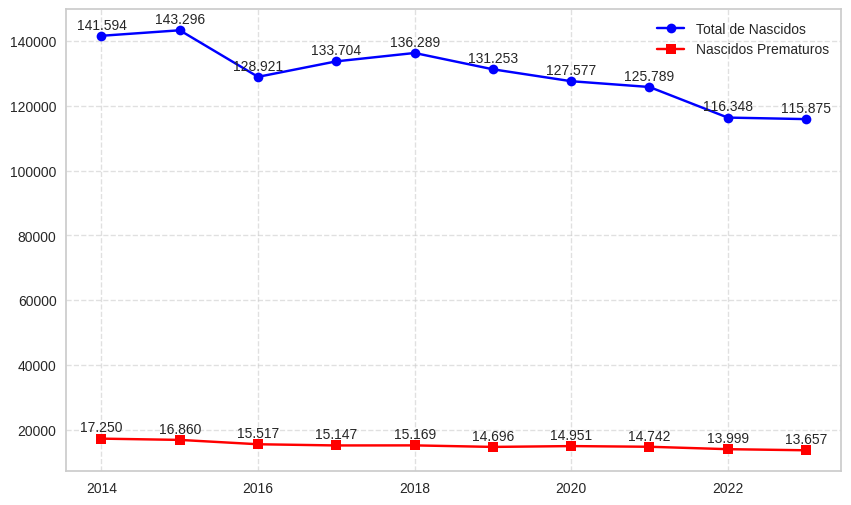

In [ ]:
# Plotar o gráfico

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando Total de Nascidos
ax.plot(nascidos_por_ano.index, nascidos_por_ano.values, marker='o', color='blue', label='Total de Nascidos')
for i, txt in enumerate(nascidos_por_ano.values):
    ax.annotate(f"{txt:,.0f}".replace(",", "."), (nascidos_por_ano.index[i], nascidos_por_ano.values[i]),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Plotando Nascidos Prematuros
ax.plot(prematuros_por_ano.index, prematuros_por_ano.values, marker='s', linestyle='-', color='red', label='Nascidos Prematuros')
for i, txt in enumerate(prematuros_por_ano.values):
    ax.annotate(f"{txt:,.0f}".replace(",", "."), (prematuros_por_ano.index[i], prematuros_por_ano.values[i]),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Configurando a legenda e grade
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando a tabela com os dados de nascimentos e prematuros por ano
dados_tabela = pd.DataFrame({
    "Ano": nascidos_por_ano.index,
    "Total de Nascidos": nascidos_por_ano.values,
    "Nascidos Prematuros": prematuros_por_ano.values,
})

# Adicionando a coluna de percentual de prematuros
dados_tabela["Percentual Prematuros (%)"] = (dados_tabela["Nascidos Prematuros"] / dados_tabela["Total de Nascidos"]) * 100

# Formatando para duas casas decimais
dados_tabela["Percentual Prematuros (%)"] = dados_tabela["Percentual Prematuros (%)"].round(2)

# Exibindo a tabela
display(dados_tabela)


,Ano,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,2014,141594,17250,12.18
1,2015,143296,16860,11.77
2,2016,128921,15517,12.04
3,2017,133704,15147,11.33
4,2018,136289,15169,11.13
5,2019,131253,14696,11.20
6,2020,127577,14951,11.72
7,2021,125789,14742,11.72
8,2022,116348,13999,12.03
9,2023,115875,13657,11.79


- Relação Nascidos x Escolaridade da Mãe

In [ ]:
# Dicionário de rótulos para Escolaridade da Mãe
rotulos_escolaridade = {
    1: "Nenhuma",
    2: "1 a 3 anos",
    3: "4 a 7 anos",
    4: "8 a 11 anos",
    5: "12 e mais",
    9: "Ignorado"
}

# Contar o total de nascidos por escolaridade da mãe
nascidos_por_escolaridade = sinasc_2014_2023_pe_selected.groupby("ESCMAE").size()

# Contar o total de prematuros por escolaridade da mãe
prematuros_por_escolaridade = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("ESCMAE").size()

# Criando a tabela consolidada
dados_escolaridade_tabela = pd.DataFrame({
    "Escolaridade da Mãe": nascidos_por_escolaridade.index.map(rotulos_escolaridade),
    "Total de Nascidos": nascidos_por_escolaridade.values,
    "Nascidos Prematuros": prematuros_por_escolaridade.reindex(nascidos_por_escolaridade.index, fill_value=0).values,
})

# Adicionando a coluna de percentual de prematuros
dados_escolaridade_tabela["Percentual Prematuros (%)"] = (
    (dados_escolaridade_tabela["Nascidos Prematuros"] / dados_escolaridade_tabela["Total de Nascidos"]) * 100
).round(2)

# Exibindo a tabela
display(dados_escolaridade_tabela)



,Escolaridade da Mãe,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,NaN,8,0,0.00
1,Nenhuma,7668,1186,15.47
2,1 a 3 anos,43235,6013,13.91
3,4 a 7 anos,259944,33149,12.75
4,8 a 11 anos,782208,88613,11.33
5,12 e mais,195787,21881,11.18
6,Ignorado,6061,619,10.21


- Relação Nascidos x estado civil da mãe

In [ ]:
# Dicionário de rótulos para Estado Civil da Mãe
rotulos_estado_civil = {
    1: "Solteira",
    2: "Casada",
    3: "Viúva",
    4: "Separada judicialmente/divorciada",
    5: "União estável",
    9: "Ignorado"
}

# Contar o total de nascidos por estado civil da mãe
nascidos_por_estado_civil = sinasc_2014_2023_pe_selected.groupby("ESTCIVMAE").size()

# Contar o total de prematuros por estado civil da mãe
prematuros_por_estado_civil = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("ESTCIVMAE").size()

# Criando a tabela consolidada
dados_estado_civil_tabela = pd.DataFrame({
    "Situação Conjugal da Mãe": nascidos_por_estado_civil.index.map(rotulos_estado_civil),
    "Total de Nascidos": nascidos_por_estado_civil.values,
    "Nascidos Prematuros": prematuros_por_estado_civil.reindex(nascidos_por_estado_civil.index, fill_value=0).values,
})

# Adicionando a coluna de percentual de prematuros
dados_estado_civil_tabela["Percentual Prematuros (%)"] = (
    (dados_estado_civil_tabela["Nascidos Prematuros"] / dados_estado_civil_tabela["Total de Nascidos"]) * 100
).round(2)

# Exibindo a tabela
display(dados_estado_civil_tabela)


,Situação Conjugal da Mãe,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Solteira,626021,73367,11.72
1,Casada,385877,42832,11.10
2,Viúva,2726,326,11.96
3,Separada judicialmente/divorciada,13540,1697,12.53
4,União estável,261738,32693,12.49
5,Ignorado,3305,401,12.13


- Relação Nascidos x Idade das mães

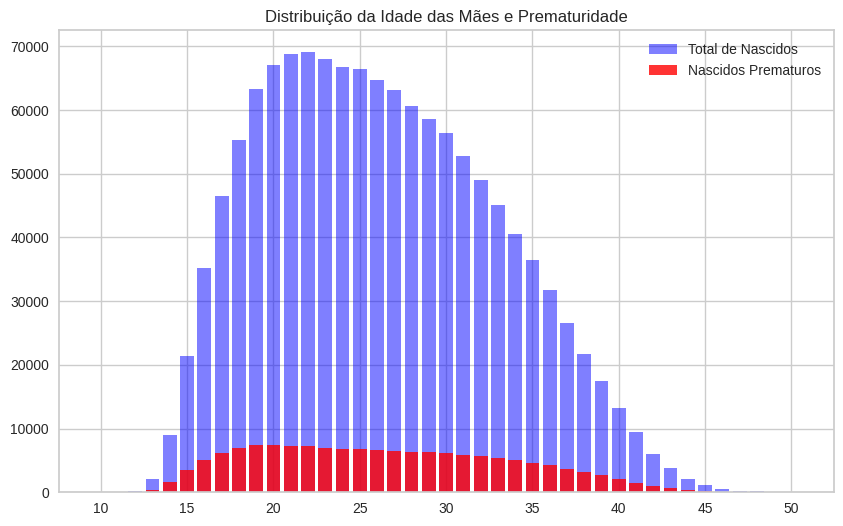

In [ ]:
# Histograma número de nascidos x idade das mães

# Filtrando os dados para idades até 50 anos
dados_filtrados = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["IDADEMAE"] <= 50]

# Contando os nascidos por idade da mãe
nascidos_totais = dados_filtrados["IDADEMAE"].value_counts().sort_index()
nascidos_prematuros = dados_filtrados[dados_filtrados["PREMATURO"] == 1]["IDADEMAE"].value_counts().sort_index()

# Criando o histograma
plt.figure(figsize=(10,6))
plt.bar(nascidos_totais.index, nascidos_totais.values, color='blue', alpha=0.5, label="Total de Nascidos")
plt.bar(nascidos_prematuros.index, nascidos_prematuros.values, color='red', alpha=0.8, label="Nascidos Prematuros")

# Adicionando rótulos e legenda
plt.legend()
plt.title("Distribuição da Idade das Mães e Prematuridade")
plt.show()



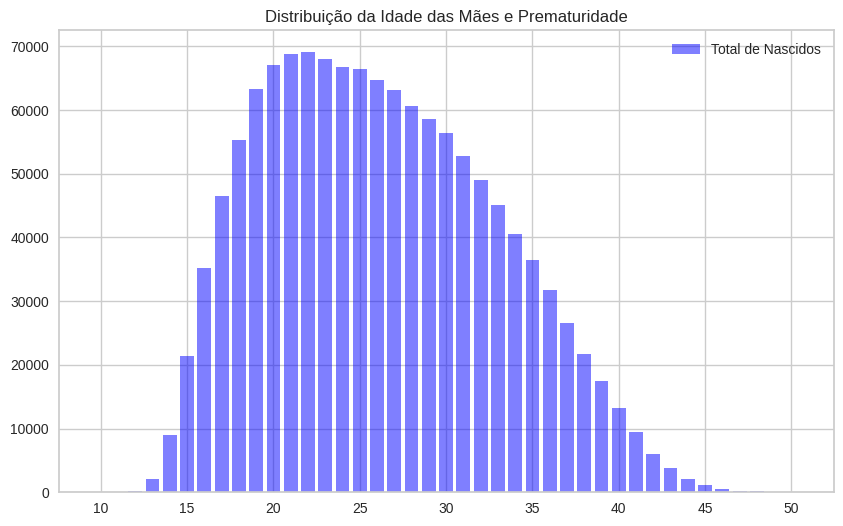

In [ ]:
# Criando o histograma
plt.figure(figsize=(10,6))
plt.bar(nascidos_totais.index, nascidos_totais.values, color='blue', alpha=0.5, label="Total de Nascidos")

# Adicionando rótulos e legenda
plt.legend()
plt.title("Distribuição da Idade das Mães e Prematuridade")
plt.show()


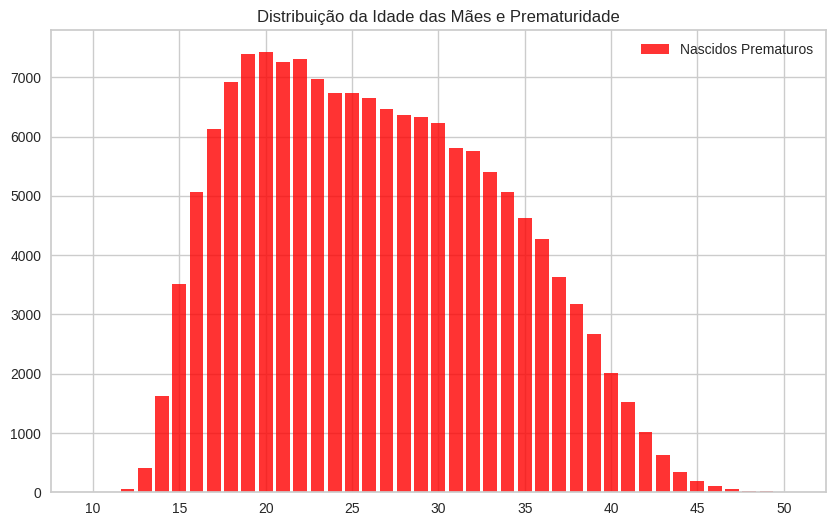

In [ ]:
# Criando o histograma
plt.figure(figsize=(10,6))
plt.bar(nascidos_prematuros.index, nascidos_prematuros.values, color='red', alpha=0.8, label="Nascidos Prematuros")

# Adicionando rótulos e legenda
plt.legend()
plt.title("Distribuição da Idade das Mães e Prematuridade")
plt.show()

In [ ]:
# Vendo os dados em tabela.
# As idades foram limitadas a 65 anos, pois após disso não havia registros


# Definir os grupos etários de 5 em 5 anos até 65 anos
bins = list(range(10, 70, 5))  # Faixas etárias de 10 a 65 anos
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]  # Criando rótulos ex: "10-14", "15-19", ...

# Filtrando os dados até 65 anos
dados_filtrados = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["IDADEMAE"] <= 65]

# Criando uma nova coluna de faixa etária
dados_filtrados["Faixa Etária"] = pd.cut(dados_filtrados["IDADEMAE"], bins=bins, labels=labels, right=False)

# Contando os nascidos por faixa etária
nascidos_totais = dados_filtrados.groupby("Faixa Etária").size()
nascidos_prematuros = dados_filtrados[dados_filtrados["PREMATURO"] == 1].groupby("Faixa Etária").size()

# Criando a tabela final
tabela_faixa_etaria = pd.DataFrame({
    "Faixa Etária": labels,
    "Total de Nascidos": nascidos_totais.reindex(labels, fill_value=0),
    "Nascidos Prematuros": nascidos_prematuros.reindex(labels, fill_value=0)
})

# Calculando o percentual de prematuros
tabela_faixa_etaria["Percentual Prematuros (%)"] = (tabela_faixa_etaria["Nascidos Prematuros"] / tabela_faixa_etaria["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
tabela_faixa_etaria



,Faixa Etária,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
Faixa Etária,,,,
10-14,10-14,11373,2109,18.54
15-19,15-19,221710,29039,13.10
20-24,20-24,339568,35704,10.51
25-29,25-29,313373,32559,10.39
30-34,30-34,243865,28259,11.59
35-39,35-39,133985,18388,13.72
40-44,40-44,34582,5531,15.99
45-49,45-49,2018,378,18.73
50-54,50-54,134,20,14.93


- Relação Nascidos x Tipo de gravidez

In [ ]:
# Contar o total de nascimentos por tipo de gravidez
nascidos_por_gravidez = sinasc_2014_2023_pe_selected.groupby("GRAVIDEZ").size()

# Contar o total de prematuros por tipo de gravidez
prematuros_por_gravidez = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("GRAVIDEZ").size()

# Substituir os índices numéricos pelos rótulos correspondentes
rotulos_gravidez = {
    1: "Única",
    2: "Dupla",
    3: "Tripla ou mais",
    9: "Ignorado"
}

# Mapeando os rótulos traduzidos
nascidos_por_gravidez.index = nascidos_por_gravidez.index.map(rotulos_gravidez)
prematuros_por_gravidez.index = prematuros_por_gravidez.index.map(rotulos_gravidez)


# Criando a tabela com os dados de nascimentos e prematuros por tipo de gravidez
dados_gravidez_tabela = pd.DataFrame({
    "Tipo de Gravidez": nascidos_por_gravidez.index,
    "Total de Nascidos": nascidos_por_gravidez.values,
    "Nascidos Prematuros": prematuros_por_gravidez.reindex(nascidos_por_gravidez.index, fill_value=0).values,
})

# Adicionando a coluna de percentual de prematuros
dados_gravidez_tabela["Percentual Prematuros (%)"] = (
    (dados_gravidez_tabela["Nascidos Prematuros"] / dados_gravidez_tabela["Total de Nascidos"]) * 100
).round(2)

# Exibindo a tabela
dados_gravidez_tabela

,Tipo de Gravidez,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Única,1272859,137176,10.78
1,Dupla,26047,14161,54.37
2,Tripla ou mais,586,530,90.44
3,Ignorado,25,6,24.00


- Relação Nascidos x Local de Nascimento

In [ ]:
# Dicionário para mapear os códigos de LOCNASC para categorias
locnasc_labels = {
    1: "Hospital",
    2: "Outros estabelecimentos de saúde",
    3: "Domicílio",
    4: "Outros",
    5: "Aldeia Indígena",
    9: "Ignorado"
}

# Contar o total de nascimentos por local de nascimento
nascidos_por_locnasc = sinasc_2014_2023_pe_selected.groupby("LOCNASC").size()

# Contar o total de prematuros por local de nascimento
prematuros_por_locnasc = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("LOCNASC").size()

# Criar DataFrame para a tabela
dados_locnasc = pd.DataFrame({
    "Local de Nascimento": [locnasc_labels.get(idx, idx) for idx in nascidos_por_locnasc.index],
    "Total de Nascidos": nascidos_por_locnasc.values,
    "Nascidos Prematuros": prematuros_por_locnasc.reindex(nascidos_por_locnasc.index, fill_value=0).values
})

# Adicionar percentual de prematuros
dados_locnasc["Percentual Prematuros (%)"] = (dados_locnasc["Nascidos Prematuros"] / dados_locnasc["Total de Nascidos"] * 100).round(2)

# Ordenar em ordem decrescente pelo total de nascidos
dados_locnasc = dados_locnasc.sort_values(by="Total de Nascidos", ascending=False)

# Exibir a tabela
dados_locnasc



,Local de Nascimento,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Hospital,1289754,150261,11.65
1,Outros estabelecimentos de saúde,4545,279,6.14
2,Domicílio,3700,655,17.70
3,Outros,2608,789,30.25
4,Ignorado,39,4,10.26


- Relação Nascidos x Número de Filhos Vivos

In [ ]:
# Contar o total de nascidos por número de filhos vivos
nascidos_por_filhos_vivos = sinasc_2014_2023_pe_selected.groupby("QTDFILVIVO").size()

# Contar o total de prematuros por número de filhos vivos
prematuros_por_filhos_vivos = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("QTDFILVIVO").size()

# Criar o DataFrame consolidado
dados_filhos_vivos = pd.DataFrame({
    "Quant. Filhos Vivos": nascidos_por_filhos_vivos.index.astype(str),  # Converter índice para string
    "Total de Nascidos": nascidos_por_filhos_vivos.values,
    "Nascidos Prematuros": prematuros_por_filhos_vivos.reindex(nascidos_por_filhos_vivos.index, fill_value=0).values
})

# Separar a categoria "Ignorado" (99)
dados_filhos_vivos.loc[dados_filhos_vivos["Quant. Filhos Vivos"] == "99.0", "Quant. Filhos Vivos"] = "Ignorado"

# Converter para float apenas os valores numéricos
dados_filhos_vivos["Quant. Filhos Vivos"] = pd.to_numeric(dados_filhos_vivos["Quant. Filhos Vivos"], errors='coerce')

# Agrupar os valores 10 ou mais
dados_filhos_vivos.loc[dados_filhos_vivos["Quant. Filhos Vivos"] >= 10, "Quant. Filhos Vivos"] = "10 ou mais"

# Converter tudo para string antes de agrupar
dados_filhos_vivos["Quant. Filhos Vivos"] = dados_filhos_vivos["Quant. Filhos Vivos"].astype(str)

# Agrupar os dados novamente para consolidar as categorias
dados_filhos_vivos = dados_filhos_vivos.groupby("Quant. Filhos Vivos", as_index=False).sum()

# Corrigir o cálculo do percentual de prematuros
dados_filhos_vivos["Percentual Prematuros (%)"] = (dados_filhos_vivos["Nascidos Prematuros"] / dados_filhos_vivos["Total de Nascidos"] * 100).round(2)

# Tratar casos onde o número de nascidos é muito pequeno
dados_filhos_vivos.loc[dados_filhos_vivos["Total de Nascidos"] < 10, "Percentual Prematuros (%)"] = "Valor muito pequeno"

# Ordenar corretamente as categorias garantindo que "10 ou mais" e "Ignorado" fiquem no final se existirem
ordem = sorted([x for x in dados_filhos_vivos["Quant. Filhos Vivos"] if x not in ["10 ou mais", "Ignorado"]], key=lambda x: float(x))
if "10 ou mais" in dados_filhos_vivos["Quant. Filhos Vivos"].values:
    ordem.append("10 ou mais")
if "Ignorado" in dados_filhos_vivos["Quant. Filhos Vivos"].values:
    ordem.append("Ignorado")

# Aplicar a ordenação final
dados_filhos_vivos = dados_filhos_vivos.set_index("Quant. Filhos Vivos").loc[ordem].reset_index()

# Exibir a tabela
display(dados_filhos_vivos)



,Quant. Filhos Vivos,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,0.0,562654,67691,12.03
1,1.0,414969,44243,10.66
2,2.0,187140,21838,11.67
3,3.0,69708,8897,12.76
4,4.0,29207,4135,14.16
5,5.0,13918,2026,14.56
6,6.0,7232,1108,15.32
7,7.0,3826,623,16.28
8,8.0,2053,355,17.29
9,9.0,1133,196,17.3


- Relação Nascidos x Número de Filhos Mortos

In [ ]:
# Contar o total de nascidos por número de filhos mortos
nascidos_por_filhos_mortos = sinasc_2014_2023_pe_selected.groupby("QTDFILMORT").size()

# Contar o total de prematuros por número de filhos mortos
prematuros_por_filhos_mortos = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("QTDFILMORT").size()

# Criar o DataFrame consolidado
dados_filhos_mortos = pd.DataFrame({
    "Quant. Filhos Mortos": nascidos_por_filhos_mortos.index.astype(str),  # Converter índice para string
    "Total de Nascidos": nascidos_por_filhos_mortos.values,
    "Nascidos Prematuros": prematuros_por_filhos_mortos.reindex(nascidos_por_filhos_mortos.index, fill_value=0).values
})

# Separar a categoria "Ignorado" (99)
dados_filhos_mortos.loc[dados_filhos_mortos["Quant. Filhos Mortos"] == "99.0", "Quant. Filhos Mortos"] = "Ignorado"

# Converter para float apenas os valores numéricos
dados_filhos_mortos["Quant. Filhos Mortos"] = pd.to_numeric(dados_filhos_mortos["Quant. Filhos Mortos"], errors='coerce')

# Agrupar os valores 10 ou mais
dados_filhos_mortos.loc[dados_filhos_mortos["Quant. Filhos Mortos"] >= 10, "Quant. Filhos Mortos"] = "10 ou mais"

# Converter tudo para string antes de agrupar
dados_filhos_mortos["Quant. Filhos Mortos"] = dados_filhos_mortos["Quant. Filhos Mortos"].astype(str)

# Agrupar os dados novamente para consolidar as categorias
dados_filhos_mortos = dados_filhos_mortos.groupby("Quant. Filhos Mortos", as_index=False).sum()

# Corrigir o cálculo do percentual de prematuros
dados_filhos_mortos["Percentual Prematuros (%)"] = (dados_filhos_mortos["Nascidos Prematuros"] / dados_filhos_mortos["Total de Nascidos"] * 100).round(2)

# Tratar casos onde o número de nascidos é muito pequeno
dados_filhos_mortos.loc[dados_filhos_mortos["Total de Nascidos"] < 10, "Percentual Prematuros (%)"] = "Valor muito pequeno"

# Ordenar corretamente as categorias garantindo que "10 ou mais" e "Ignorado" fiquem no final se existirem
ordem = sorted([x for x in dados_filhos_mortos["Quant. Filhos Mortos"] if x not in ["10 ou mais", "Ignorado"]], key=lambda x: float(x))
if "10 ou mais" in dados_filhos_mortos["Quant. Filhos Mortos"].values:
    ordem.append("10 ou mais")
if "Ignorado" in dados_filhos_mortos["Quant. Filhos Mortos"].values:
    ordem.append("Ignorado")

# Aplicar a ordenação final
dados_filhos_mortos = dados_filhos_mortos.set_index("Quant. Filhos Mortos").loc[ordem].reset_index()

# Exibir a tabela
display(dados_filhos_mortos)


,Quant. Filhos Mortos,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,0.0,1044294,117900,11.29
1,1.0,194979,25014,12.83
2,2.0,38737,5864,15.14
3,3.0,8941,1539,17.21
4,4.0,2259,449,19.88
5,5.0,745,165,22.15
6,6.0,321,66,20.56
7,7.0,114,24,21.05
8,8.0,67,17,25.37
9,9.0,36,7,19.44


- Relação Nascidos x número de gestações anteriores

In [ ]:
# Contar o total de nascidos por número de gestações anteriores
nascidos_por_gestacoes = sinasc_2014_2023_pe_selected.groupby("QTDGESTANT").size()

# Contar o total de prematuros por número de gestações anteriores
prematuros_por_gestacoes = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("QTDGESTANT").size()

# Criar o DataFrame consolidado
dados_gestacoes = pd.DataFrame({
    "Quant. Gestações": nascidos_por_gestacoes.index.astype(str),  # Converter índice para string
    "Total de Nascidos": nascidos_por_gestacoes.values,
    "Nascidos Prematuros": prematuros_por_gestacoes.reindex(nascidos_por_gestacoes.index, fill_value=0).values
})

# Separar a categoria "Ignorado" (99)
dados_gestacoes.loc[dados_gestacoes["Quant. Gestações"] == "99.0", "Quant. Gestações"] = "Ignorado"

# Converter para float apenas os valores numéricos
dados_gestacoes["Quant. Gestações"] = pd.to_numeric(dados_gestacoes["Quant. Gestações"], errors='coerce')

# Agrupar os valores 10 ou mais
dados_gestacoes.loc[dados_gestacoes["Quant. Gestações"] >= 10, "Quant. Gestações"] = "10 ou mais"

# Converter tudo para string antes de agrupar
dados_gestacoes["Quant. Gestações"] = dados_gestacoes["Quant. Gestações"].astype(str)

# Agrupar os dados novamente para consolidar as categorias
dados_gestacoes = dados_gestacoes.groupby("Quant. Gestações", as_index=False).sum()

# Corrigir o cálculo do percentual de prematuros
dados_gestacoes["Percentual Prematuros (%)"] = (dados_gestacoes["Nascidos Prematuros"] / dados_gestacoes["Total de Nascidos"] * 100).round(2)

# Tratar casos onde o número de nascidos é muito pequeno
dados_gestacoes.loc[dados_gestacoes["Total de Nascidos"] < 10, "Percentual Prematuros (%)"] = "Valor muito pequeno"

# Ordenar corretamente as categorias garantindo que "10 ou mais" e "Ignorado" fiquem no final se existirem
ordem = sorted([x for x in dados_gestacoes["Quant. Gestações"] if x not in ["10 ou mais", "Ignorado"]], key=lambda x: float(x))
if "10 ou mais" in dados_gestacoes["Quant. Gestações"].values:
    ordem.append("10 ou mais")
if "Ignorado" in dados_gestacoes["Quant. Gestações"].values:
    ordem.append("Ignorado")

# Aplicar a ordenação final
dados_gestacoes = dados_gestacoes.set_index("Quant. Gestações").loc[ordem].reset_index()

# Exibir a tabela
display(dados_gestacoes)


,Quant. Gestações,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,0.0,497650,58203,11.7
1,1.0,390987,41934,10.73
2,2.0,213132,24839,11.65
3,3.0,98809,12537,12.69
4,4.0,45750,6403,14.0
5,5.0,22375,3343,14.94
6,6.0,11567,1793,15.5
7,7.0,6275,1016,16.19
8,8.0,3453,610,17.67
9,9.0,2024,343,16.95


- Relação Nascidos x número de partos normais

In [ ]:
# Contar o total de nascidos por número de partos normais
nascidos_por_parto_normal = sinasc_2014_2023_pe_selected.groupby("QTDPARTNOR").size()

# Contar o total de prematuros por número de partos normais
prematuros_por_parto_normal = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("QTDPARTNOR").size()

# Criar o DataFrame consolidado
dados_parto_normal = pd.DataFrame({
    "Quant. Partos Normais": nascidos_por_parto_normal.index.astype(str),  # Converter índice para string
    "Total de Nascidos": nascidos_por_parto_normal.values,
    "Nascidos Prematuros": prematuros_por_parto_normal.reindex(nascidos_por_parto_normal.index, fill_value=0).values
})

# Separar a categoria "Ignorado" (99)
dados_parto_normal.loc[dados_parto_normal["Quant. Partos Normais"] == "99.0", "Quant. Partos Normais"] = "Ignorado"

# Converter para float apenas os valores numéricos
dados_parto_normal["Quant. Partos Normais"] = pd.to_numeric(dados_parto_normal["Quant. Partos Normais"], errors='coerce')

# Agrupar os valores 10 ou mais
dados_parto_normal.loc[dados_parto_normal["Quant. Partos Normais"] >= 10, "Quant. Partos Normais"] = "10 ou mais"

# Converter tudo para string antes de agrupar
dados_parto_normal["Quant. Partos Normais"] = dados_parto_normal["Quant. Partos Normais"].astype(str)

# Agrupar os dados novamente para consolidar as categorias
dados_parto_normal = dados_parto_normal.groupby("Quant. Partos Normais", as_index=False).sum()

# Corrigir o cálculo do percentual de prematuros
dados_parto_normal["Percentual Prematuros (%)"] = (dados_parto_normal["Nascidos Prematuros"] / dados_parto_normal["Total de Nascidos"] * 100).round(2)

# Tratar casos onde o número de nascidos é muito pequeno
dados_parto_normal.loc[dados_parto_normal["Total de Nascidos"] < 10, "Percentual Prematuros (%)"] = "Valor muito pequeno"

# Ordenar corretamente as categorias garantindo que "10 ou mais" e "Ignorado" fiquem no final se existirem
ordem = sorted([x for x in dados_parto_normal["Quant. Partos Normais"] if x not in ["10 ou mais", "Ignorado"]], key=lambda x: float(x))
if "10 ou mais" in dados_parto_normal["Quant. Partos Normais"].values:
    ordem.append("10 ou mais")
if "Ignorado" in dados_parto_normal["Quant. Partos Normais"].values:
    ordem.append("Ignorado")

# Aplicar a ordenação final
dados_parto_normal = dados_parto_normal.set_index("Quant. Partos Normais").loc[ordem].reset_index()

# Exibir a tabela
display(dados_parto_normal)


,Quant. Partos Normais,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,0.0,807050,92071,11.41
1,1.0,258876,30067,11.61
2,2.0,119987,14554,12.13
3,3.0,53537,6831,12.76
4,4.0,25293,3474,13.74
5,5.0,12722,1890,14.86
6,6.0,6883,1088,15.81
7,7.0,3615,583,16.13
8,8.0,2028,352,17.36
9,9.0,1136,188,16.55


- Relação Nascidos x número de partos cesários

In [ ]:
######## Precisa corrigir algumas linhas da tabela ##########

# Contar o total de nascidos por número de partos cesáreos
nascidos_por_parto_cesareo = sinasc_2014_2023_pe_selected.groupby("QTDPARTCES").size()

# Contar o total de prematuros por número de partos cesáreos
prematuros_por_parto_cesareo = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("QTDPARTCES").size()

# Criar o DataFrame consolidado
dados_parto_cesareo = pd.DataFrame({
    "Quant. Partos Cesáreos": nascidos_por_parto_cesareo.index.astype(str),  # Converter índice para string
    "Total de Nascidos": nascidos_por_parto_cesareo.values,
    "Nascidos Prematuros": prematuros_por_parto_cesareo.reindex(nascidos_por_parto_cesareo.index, fill_value=0).values
})

# Separar a categoria "Ignorado" (99)
dados_parto_cesareo.loc[dados_parto_cesareo["Quant. Partos Cesáreos"] == "99.0", "Quant. Partos Cesáreos"] = "Ignorado"

# Converter para float apenas os valores numéricos
dados_parto_cesareo["Quant. Partos Cesáreos"] = pd.to_numeric(dados_parto_cesareo["Quant. Partos Cesáreos"], errors='coerce')

# Agrupar os valores 10 ou mais
dados_parto_cesareo.loc[dados_parto_cesareo["Quant. Partos Cesáreos"] >= 10, "Quant. Partos Cesáreos"] = "10 ou mais"

# Converter tudo para string antes de agrupar
dados_parto_cesareo["Quant. Partos Cesáreos"] = dados_parto_cesareo["Quant. Partos Cesáreos"].astype(str)

# Agrupar os dados novamente para consolidar as categorias
dados_parto_cesareo = dados_parto_cesareo.groupby("Quant. Partos Cesáreos", as_index=False).sum()

# Corrigir o cálculo do percentual de prematuros
dados_parto_cesareo["Percentual Prematuros (%)"] = (dados_parto_cesareo["Nascidos Prematuros"] / dados_parto_cesareo["Total de Nascidos"] * 100).round(2)

# Tratar casos onde o número de nascidos é muito pequeno
dados_parto_cesareo.loc[dados_parto_cesareo["Total de Nascidos"] < 10, "Percentual Prematuros (%)"] = "Valor muito pequeno"

# Ordenar corretamente as categorias garantindo que "10 ou mais" e "Ignorado" fiquem no final se existirem
ordem = sorted([x for x in dados_parto_cesareo["Quant. Partos Cesáreos"] if x not in ["10 ou mais", "Ignorado"]], key=lambda x: float(x))
if "10 ou mais" in dados_parto_cesareo["Quant. Partos Cesáreos"].values:
    ordem.append("10 ou mais")
if "Ignorado" in dados_parto_cesareo["Quant. Partos Cesáreos"].values:
    ordem.append("Ignorado")

# Aplicar a ordenação final
dados_parto_cesareo = dados_parto_cesareo.set_index("Quant. Partos Cesáreos").loc[ordem].reset_index()

# Exibir a tabela
display(dados_parto_cesareo)


,Quant. Partos Cesáreos,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,0.0,973807,116897,12.0
1,1.0,247952,25861,10.43
2,2.0,59450,7022,11.81
3,3.0,9059,1253,13.83
4,4.0,923,142,15.38
5,5.0,98,13,13.27
6,6.0,29,2,6.9
7,7.0,15,2,13.33
8,8.0,8,2,Valor muito pequeno
9,9.0,3,0,Valor muito pequeno


- Relação Nascidos x Tipo de Parto

In [ ]:
# Contar o total de nascidos por tipo de parto
nascidos_por_parto = sinasc_2014_2023_pe_selected.groupby("PARTO").size()

# Contar o total de prematuros por tipo de parto
prematuros_por_parto = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("PARTO").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_parto = {
    1: "Vaginal",
    2: "Cesáreo",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_parto = pd.DataFrame({
    "Categoria": nascidos_por_parto.index.map(rotulos_parto),
    "Total de Nascidos": nascidos_por_parto.values,
    "Nascidos Prematuros": prematuros_por_parto.reindex(nascidos_por_parto.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_parto["Percentual Prematuros (%)"] = (dados_parto["Nascidos Prematuros"] / dados_parto["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_parto)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Vaginal,623357,74776,12.00
1,Cesáreo,676147,77102,11.40
2,Ignorado,11,1,9.09


- Relação Nascidos x Presença de Anomalia

In [ ]:
# Contar o total de nascidos por presença de anomalia
nascidos_por_anomalia = sinasc_2014_2023_pe_selected.groupby("IDANOMAL").size()

# Contar o total de prematuros por presença de anomalia
prematuros_por_anomalia = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("IDANOMAL").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_anomalia = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_anomalia = pd.DataFrame({
    "Categoria": nascidos_por_anomalia.index.map(rotulos_anomalia),
    "Total de Nascidos": nascidos_por_anomalia.values,
    "Nascidos Prematuros": prematuros_por_anomalia.reindex(nascidos_por_anomalia.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_anomalia["Percentual Prematuros (%)"] = (dados_anomalia["Nascidos Prematuros"] / dados_anomalia["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_anomalia)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Sim,13973,3401,24.34
1,Não,1282529,148044,11.54
2,Ignorado,1385,210,15.16


- Relação Nascidos x Raça da Mãe

In [ ]:
# Contar o total de nascidos por raça/cor da mãe
nascidos_por_racacor_mae = sinasc_2014_2023_pe_selected.groupby("RACACORMAE").size()

# Contar o total de prematuros por raça/cor da mãe
prematuros_por_racacor_mae = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("RACACORMAE").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_racacor_mae = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_racacor_mae = pd.DataFrame({
    "Categoria": nascidos_por_racacor_mae.index.map(rotulos_racacor_mae),
    "Total de Nascidos": nascidos_por_racacor_mae.values,
    "Nascidos Prematuros": prematuros_por_racacor_mae.reindex(nascidos_por_racacor_mae.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_racacor_mae["Percentual Prematuros (%)"] = (dados_racacor_mae["Nascidos Prematuros"] / dados_racacor_mae["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_racacor_mae)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Branca,250138,27842,11.13
1,Preta,67350,8862,13.16
2,Amarela,3826,441,11.53
3,Parda,953657,112233,11.77
4,Indígena,10270,1199,11.67
5,Ignorado,232,22,9.48


- Relação Nascidos x nascidos por tipo de apresentação
(jeito que o bebê fica para nascer)

In [ ]:
# Contar o total de nascidos por tipo de apresentação
nascidos_por_apresentacao = sinasc_2014_2023_pe_selected.groupby("TPAPRESENT").size()

# Contar o total de prematuros por tipo de apresentação
prematuros_por_apresentacao = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("TPAPRESENT").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_apresentacao = {
    1: "Cefálico",
    2: "Pélvica/Podálica",
    3: "Transversa",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_apresentacao = pd.DataFrame({
    "Categoria": nascidos_por_apresentacao.index.map(rotulos_apresentacao),
    "Total de Nascidos": nascidos_por_apresentacao.values,
    "Nascidos Prematuros": prematuros_por_apresentacao.reindex(nascidos_por_apresentacao.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_apresentacao["Percentual Prematuros (%)"] = (dados_apresentacao["Nascidos Prematuros"] / dados_apresentacao["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_apresentacao)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Cefálico,1244796,135884,10.92
1,Pélvica/Podálica,47479,14587,30.72
2,Transversa,2420,782,32.31
3,Ignorado,1618,307,18.97


- Relação Nascidos x número de consultas pré-natal

In [ ]:
# Contar o total de nascidos por número de consultas pré-natal
nascidos_por_consultas = sinasc_2014_2023_pe_selected.groupby("CONSULTAS").size()

# Contar o total de prematuros por número de consultas pré-natal
prematuros_por_consultas = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("CONSULTAS").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_consultas = {
    1: "Nenhuma",
    2: "1 a 3",
    3: "4 a 6",
    4: "7 ou mais",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_consultas = pd.DataFrame({
    "Categoria": nascidos_por_consultas.index.map(rotulos_consultas),
    "Total de Nascidos": nascidos_por_consultas.values,
    "Nascidos Prematuros": prematuros_por_consultas.reindex(nascidos_por_consultas.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_consultas["Percentual Prematuros (%)"] = (dados_consultas["Nascidos Prematuros"] / dados_consultas["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_consultas)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Nenhuma,18040,3382,18.75
1,1 a 3,73742,17679,23.97
2,4 a 6,298150,54692,18.34
3,7 ou mais,901524,74756,8.29
4,Ignorado,8405,1417,16.86


- Relação Nascidos x mês de início do pré-natal

In [ ]:
# Contar o total de nascidos por mês de início do pré-natal
nascidos_por_mesprenat = sinasc_2014_2023_pe_selected.groupby("MESPRENAT").size()

# Contar o total de prematuros por mês de início do pré-natal
prematuros_por_mesprenat = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("MESPRENAT").size()

# Criar DataFrame consolidado
dados_mesprenat = pd.DataFrame({
    "Categoria": nascidos_por_mesprenat.index.astype(str),
    "Total de Nascidos": nascidos_por_mesprenat.values,
    "Nascidos Prematuros": prematuros_por_mesprenat.reindex(nascidos_por_mesprenat.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_mesprenat["Percentual Prematuros (%)"] = (dados_mesprenat["Nascidos Prematuros"] / dados_mesprenat["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_mesprenat)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,1.0,172488,19222,11.14
1,2.0,505854,56380,11.15
2,3.0,298520,34622,11.60
3,4.0,136421,17391,12.75
4,5.0,72537,9549,13.16
5,6.0,34665,4558,13.15
6,7.0,17788,2167,12.18
7,8.0,8489,890,10.48
8,9.0,4124,233,5.65
9,10.0,93,0,0.00


- Relação Nascidos x Trabalho de parto induzido

In [ ]:
# Contar o total de nascidos por trabalho de parto induzido
nascidos_por_trabalho_parto = sinasc_2014_2023_pe_selected.groupby("STTRABPART").size()

# Contar o total de prematuros por trabalho de parto induzido
prematuros_por_trabalho_parto = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1].groupby("STTRABPART").size()

# Dicionário de rótulos para tradução dos códigos numéricos
rotulos_trabalho_parto = {
    1: "Sim",
    2: "Não",
    3: "Não se aplica",
    9: "Ignorado"
}

# Criar DataFrame consolidado
dados_trabalho_parto = pd.DataFrame({
    "Categoria": nascidos_por_trabalho_parto.index.map(rotulos_trabalho_parto),
    "Total de Nascidos": nascidos_por_trabalho_parto.values,
    "Nascidos Prematuros": prematuros_por_trabalho_parto.reindex(nascidos_por_trabalho_parto.index, fill_value=0).values
})

# Calcular percentual de prematuros
dados_trabalho_parto["Percentual Prematuros (%)"] = (dados_trabalho_parto["Nascidos Prematuros"] / dados_trabalho_parto["Total de Nascidos"] * 100).round(2)

# Exibir a tabela
display(dados_trabalho_parto)


,Categoria,Total de Nascidos,Nascidos Prematuros,Percentual Prematuros (%)
0,Sim,132666,12489,9.41
1,Não,1154283,138270,11.98
2,Ignorado,5147,525,10.20


### Etapa 3 - Preparando a base para aplicar os modelos

- Avaliando dados ausentes e ignorados

In [ ]:

# Lista de colunas e seus valores correspondentes para "ignorado"
ignored_values = {
    "MESPRENAT": 99, "RACACORMAE": 9, "RACACOR": 9, "STTRABPART": 9, "ESCMAE": 9, "ESTCIVMAE": 9,
    "QTDFILMORT": 99, "CONSULTAS": 9, "QTDPARTNOR": 99, "QTDPARTCES": 99, "QTDFILVIVO": 99,
    "QTDGESTANT": 99, "TPAPRESENT": 9, "IDANOMAL": 9, "PESO": 99, "GRAVIDEZ": 9, "PARTO": 9
}

# Calcular valores ausentes
missing_values = sinasc_2014_2023_pe_selected.isnull().sum()

# Calcular percentual de valores ausentes
total_rows = len(sinasc_2014_2023_pe_selected)
missing_percent = (missing_values / total_rows) * 100

# Calcular valores ignorados por coluna
ignored_counts = {col: (sinasc_2014_2023_pe_selected[col] == ignored_values[col]).sum() for col in ignored_values}

# Calcular percentual de valores ignorados
ignored_percent = {col: (ignored_counts[col] / total_rows) * 100 for col in ignored_values}

# Criar DataFrame com os resultados
missing_data_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual Ausentes (%)': missing_percent.round(2),
    'Valores Ignorados': pd.Series(ignored_counts),
    'Percentual Ignorados (%)': pd.Series(ignored_percent).round(2)
}).fillna(0)

# Criar coluna com a soma das proporções
missing_data_df["Total Missing + Ignored (%)"] = (missing_data_df["Percentual Ausentes (%)"] + missing_data_df["Percentual Ignorados (%)"]).round(2)

# Ordenar em ordem decrescente pelo total de valores ausentes + ignorados
missing_data_df = missing_data_df.sort_values(by="Total Missing + Ignored (%)", ascending=False)

# Exibir a tabela
missing_data_df

,Valores Ausentes,Percentual Ausentes (%),Valores Ignorados,Percentual Ignorados (%),Total Missing + Ignored (%)
MESPRENAT,18235,1.40,31432.0,2.42,3.82
RACACORMAE,15173,1.17,232.0,0.02,1.19
RACACOR,14601,1.12,232.0,0.02,1.14
STTRABPART,8550,0.66,5147.0,0.40,1.06
ESCMAE,5735,0.44,6061.0,0.47,0.91
ESTCIVMAE,7439,0.57,3305.0,0.25,0.82
QTDFILMORT,10003,0.77,59.0,0.00,0.77
CONSULTAS,785,0.06,8405.0,0.65,0.71
QTDPARTCES,9028,0.69,89.0,0.01,0.70
QTDPARTNOR,7991,0.61,72.0,0.01,0.62


  - Comentários:

    - A maioria das variáveis tem menos de 1,5% de valores ausentes, o que possivelmente não impactará o modelo;
    - Exceto a coluna 'MESPRENAT' que possui quase 2,5% das observações com ignorado. Estas linha serão excluídas na etapa de modelagem;
    - Para as demais variáveis, vamos adotar os seguintes métodos de preenchimento: moda para variáveis categóricas, mediana para variáveis numéricas


In [ ]:
# Substituição de valores ausentes conforme estratégia definida

# Substituir por Moda (variáveis categóricas)
moda_vars = ["RACACORMAE", "RACACOR", "STTRABPART", "ESTCIVMAE", "ESCMAE",
             "TPAPRESENT", "IDANOMAL", "PARTO", "GRAVIDEZ", "CONSULTAS"]
for var in moda_vars:
    sinasc_2014_2023_pe_selected[var].fillna(sinasc_2014_2023_pe_selected[var].mode()[0], inplace=True)

# Substituir por Mediana (variáveis numéricas inteiras)
mediana_vars = ["MESPRENAT", "QTDFILMORT", "QTDPARTCES",
                "QTDPARTNOR", "QTDFILVIVO", "QTDGESTANT", "PESO", ]
for var in mediana_vars:
    sinasc_2014_2023_pe_selected[var].fillna(sinasc_2014_2023_pe_selected[var].median(), inplace=True)

# Verificar se ainda há valores ausentes
print(sinasc_2014_2023_pe_selected.isnull().sum().sum(), "valores ausentes restantes.")


0 valores ausentes restantes.


In [ ]:
# Excluir linhas "ignorado" para a variável MESPRENAT

# Definindo o valor de "ignorado" para a variável MESPRENAT
valor_ignorado_mesprenat = 99

# Removendo as linhas onde MESPRENAT é igual ao valor "ignorado"
sinasc_2014_2023_pe_selected = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["MESPRENAT"] != valor_ignorado_mesprenat]

# Exibir a quantidade de linhas após a remoção
sinasc_2014_2023_pe_selected.shape


(1269214, 23)

In [ ]:
########### Converter novamente os tipos, pois depois que faz as imputações, ele volta ao que era antes

# Converter variáveis categóricas
categorical_cols = ['ESTCIVMAE', 'ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS',
                    'RACACOR', 'IDANOMAL', 'RACACORMAE', 'TPAPRESENT', 'STTRABPART',
                    'LOCNASC', 'SEXO']

for col in categorical_cols:
    sinasc_2014_2023_pe_selected[col] = sinasc_2014_2023_pe_selected[col].astype('object')



# Converter variáveis numéricas inteiras
# integer_cols = ['ANO', 'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'QTDGESTANT', 'QTDPARTNOR',
#                'QTDPARTCES', 'MESPRENAT', 'CONSPRENAT']

#for col in integer_cols:
#    sinasc_2014_2023_pe_selected[col] = pd.to_numeric(sinasc_2014_2023_pe_selected[col], downcast='integer')

In [ ]:
# Verificando os novos tipos de dados novamente
print(sinasc_2014_2023_pe_selected.dtypes)

ANO             int64
LOCNASC        object
IDADEMAE        int64
ESTCIVMAE      object
ESCMAE         object
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO       object
GRAVIDEZ       object
PARTO          object
CONSULTAS      object
SEXO           object
RACACOR        object
PESO          float64
IDANOMAL       object
RACACORMAE     object
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
MESPRENAT     float64
TPAPRESENT     object
STTRABPART     object
PREMATURO      object
dtype: object


- Tirar variáveis ['GESTACAO', 'PESO'] da base

In [ ]:
# Criar novo dataframe sem informações da duração da gravidez e do peso do bebê para não influenciar o algoritmo
sinasc_2014_2023_pe_selected2 = sinasc_2014_2023_pe_selected.drop(columns=['GESTACAO', 'PESO'])

print(sinasc_2014_2023_pe_selected2.columns)

Index(['ANO', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'SEXO', 'RACACOR', 'IDANOMAL', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'PREMATURO'],
      dtype='object')


- Dividindo em treino e teste

In [ ]:
# Dividindo o banco original em dois bancos: teste e treino

from sklearn.model_selection import train_test_split

sinasc_2014_2023_pe_selected2_train, sinasc_2014_2023_pe_selected2_test = train_test_split(sinasc_2014_2023_pe_selected2, test_size=0.3, random_state=42)
# train_test_split(df, test_size=0.3) → Divide o DataFrame inteiro em duas partes, sendo 70% para treino e 30% para teste.
# random_state=42 → Garante que a divisão seja sempre a mesma quando o código for executado novamente (reprodutibilidade).

# Exibir os tamanhos das bases
print("Tamanho da base de treino:", sinasc_2014_2023_pe_selected2_train.shape)
print("Tamanho da base de teste:", sinasc_2014_2023_pe_selected2_test.shape)

Tamanho da base de treino: (888449, 21)
Tamanho da base de teste: (380765, 21)


In [ ]:
# Verificando a distribuição da variável 'PREMATURO' nos conjuntos de dados original, treino e teste

print("Proporção no DataFrame original:")
print(sinasc_2014_2023_pe_selected2['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

print("\nProporção no Treino:")
print(sinasc_2014_2023_pe_selected2_train['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

print("\nProporção no Teste:")
print(sinasc_2014_2023_pe_selected2_test['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

Proporção no DataFrame original:
PREMATURO
0.0    88.351452
1.0    11.648548
Name: Proportion, dtype: float64

Proporção no Treino:
PREMATURO
0.0    88.353411
1.0    11.646589
Name: Proportion, dtype: float64

Proporção no Teste:
PREMATURO
0.0    88.346881
1.0    11.653119
Name: Proportion, dtype: float64


In [ ]:
# Verificando a quantidade de respostas  na variavel target da base de treino
sinasc_2014_2023_pe_selected2_train['PREMATURO'].value_counts()

,count
PREMATURO,
0.0,784975
1.0,103474


In [ ]:
#  Visualizando Cabeçalho dos dados de treino
sinasc_2014_2023_pe_selected2_train.head(10)

,ANO,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,PARTO,CONSULTAS,SEXO,RACACOR,IDANOMAL,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,MESPRENAT,TPAPRESENT,STTRABPART,PREMATURO
1260236,2023,1,21,1.0,5.0,0.0,0.0,1.0,2.0,4.0,2,4.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
1041637,2021,1,32,1.0,4.0,1.0,0.0,1.0,2.0,4.0,1,1.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0
1322224,2023,1,16,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2,4.0,2.0,4.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0
748202,2019,1,28,5.0,5.0,0.0,0.0,1.0,1.0,4.0,2,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
161063,2015,1,26,2.0,4.0,1.0,0.0,1.0,1.0,3.0,1,4.0,2.0,4.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0
250001,2015,1,30,1.0,3.0,7.0,1.0,1.0,1.0,3.0,1,4.0,2.0,4.0,7.0,7.0,0.0,4.0,1.0,2.0,0.0
748508,2019,1,28,2.0,5.0,0.0,0.0,1.0,2.0,4.0,1,1.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
1200500,2022,1,18,1.0,4.0,0.0,0.0,1.0,1.0,4.0,2,4.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
387174,2016,1,18,1.0,3.0,1.0,0.0,1.0,2.0,3.0,1,4.0,2.0,4.0,1.0,1.0,0.0,4.0,1.0,2.0,1.0
398993,2016,1,19,1.0,4.0,0.0,0.0,1.0,2.0,1.0,1,4.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0


In [ ]:
print(sinasc_2014_2023_pe_selected2_train.dtypes)

ANO             int64
LOCNASC        object
IDADEMAE        int64
ESTCIVMAE      object
ESCMAE         object
QTDFILVIVO    float64
QTDFILMORT    float64
GRAVIDEZ       object
PARTO          object
CONSULTAS      object
SEXO           object
RACACOR        object
IDANOMAL       object
RACACORMAE     object
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
MESPRENAT     float64
TPAPRESENT     object
STTRABPART     object
PREMATURO      object
dtype: object


### Etapa 4 - Aplicação de Modelos de Machine Learning




## 3.1 - Floresta Aleatória sem balanceamento

In [ ]:
# Configurando o ambiente PyCaret com dados de treino

cdt = setup(data = sinasc_2014_2023_pe_selected2_train, # base de treino
            target = 'PREMATURO', # Nome da coluna de classes
            session_id = 123) # session_id para reprodutibilidade)

,Description,Value
0,Session id,123
1,Target,PREMATURO
2,Target type,Binary
3,Original data shape,"(888449, 21)"
4,Transformed data shape,"(888449, 69)"
5,Transformed train set shape,"(621914, 69)"
6,Transformed test set shape,"(266535, 69)"
7,Numeric features,8
8,Categorical features,12
9,Preprocess,True


In [ ]:
# <> -----------------------------
# <> Criação do Modelo com Árvore de Decisão
rf_fold_tree_model = create_model('rf',
                                  n_estimators = 5,
                                  max_depth = 10,
                                  min_samples_split = 2,
                                  fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8869,0.6861,0.0622,0.6524,0.1136,0.0952,0.1770
1,0.8871,0.6890,0.0612,0.6647,0.1120,0.0942,0.1779
2,0.8862,0.6906,0.0443,0.6730,0.0832,0.0698,0.1525
3,0.8872,0.6890,0.0653,0.6592,0.1188,0.0999,0.1828
4,0.8874,0.6889,0.0654,0.6697,0.1191,0.1005,0.1850
Mean,0.8870,0.6887,0.0597,0.6638,0.1093,0.0919,0.1750
Std,0.0004,0.0014,0.0079,0.0073,0.0134,0.0114,0.0116


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(rf_fold_tree_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


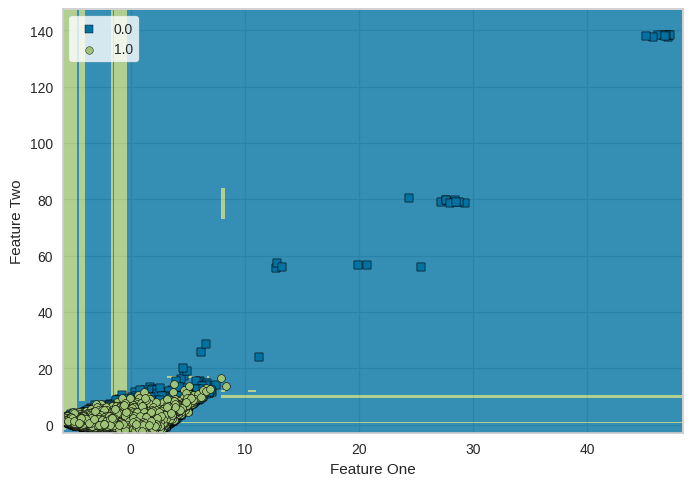

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'boundary')

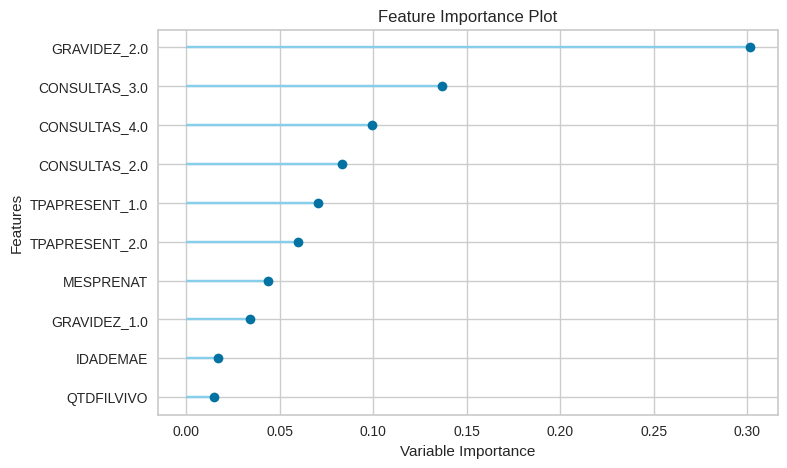

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'feature')

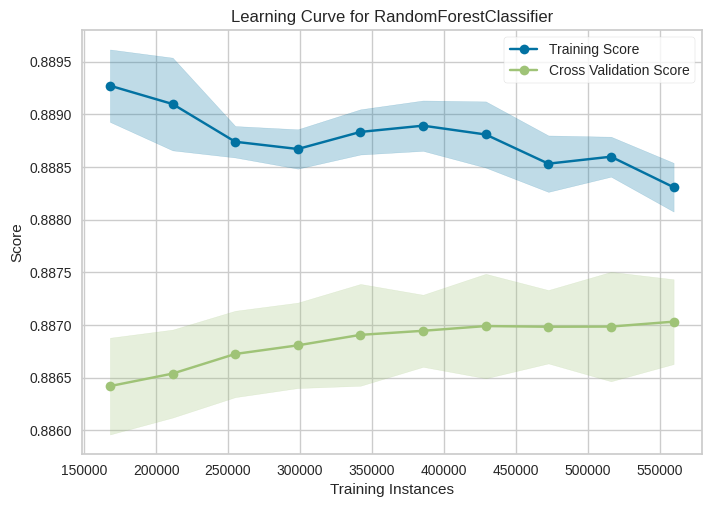

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'learning')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rf_testing_pred = predict_model(rf_fold_tree_model, data = sinasc_2014_2023_pe_selected2_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8872,0.6832,0.0587,0.6850,0.1081,0.0914,0.1779


In [ ]:
# <> -----------------------------------
# <> Visualizando Cabeçalho do Data.Frame
rf_testing_pred.head(20)

,ANO,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,PARTO,CONSULTAS,SEXO,RACACOR,IDANOMAL,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,MESPRENAT,TPAPRESENT,STTRABPART,PREMATURO,prediction_label,prediction_score
1197979,2022,1,28,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1,4.0,2.0,4.0,4.0,0.0,1.0,1.0,1.0,2.0,0.0,0,0.8974
235051,2015,1,28,2.0,5.0,0.0,0.0,1.0,1.0,4.0,2,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0,0.9295
37667,2014,1,19,5.0,4.0,0.0,2.0,1.0,1.0,4.0,M,4.0,2.0,4.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,0,0.9010
208902,2015,1,16,5.0,3.0,0.0,0.0,1.0,1.0,3.0,1,4.0,2.0,4.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0,0.7770
906636,2020,1,25,1.0,3.0,2.0,0.0,1.0,1.0,4.0,1,4.0,2.0,4.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,0,0.9223
927216,2020,1,17,1.0,4.0,0.0,0.0,1.0,1.0,4.0,2,2.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0,0.9307
836205,2020,1,22,5.0,4.0,2.0,0.0,1.0,1.0,2.0,1,2.0,2.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,0.0,0,0.8037
640600,2018,1,15,5.0,3.0,0.0,0.0,1.0,1.0,4.0,1,4.0,2.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0,0.9260
263568,2015,1,20,2.0,4.0,2.0,0.0,1.0,1.0,3.0,1,4.0,2.0,4.0,2.0,2.0,0.0,3.0,1.0,2.0,0.0,0,0.8095
794153,2019,1,21,5.0,4.0,0.0,0.0,1.0,1.0,2.0,2,4.0,2.0,4.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0,0.6998


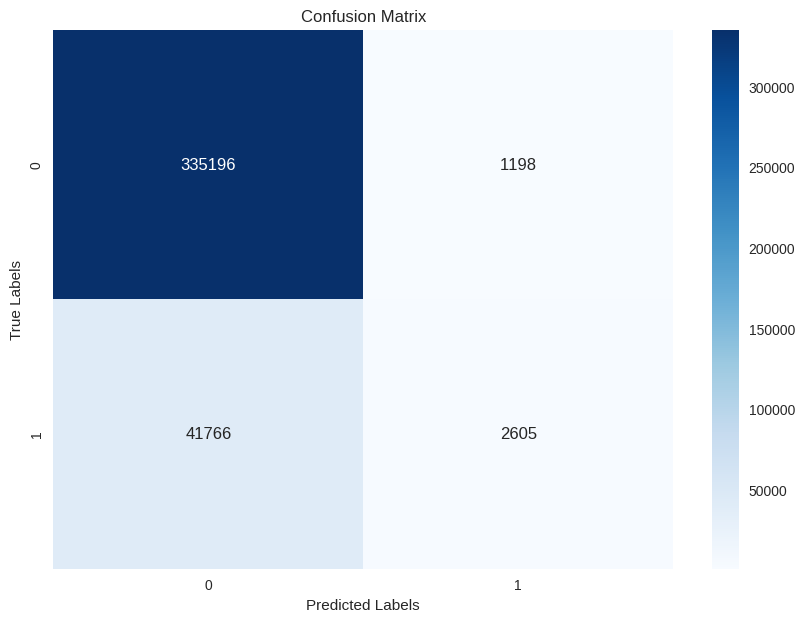

Accuracy: 0.8871639987919058
Kappa: 0.09143322799505293
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    336394
         1.0       0.68      0.06      0.11     44371

    accuracy                           0.89    380765
   macro avg       0.79      0.53      0.52    380765
weighted avg       0.87      0.89      0.84    380765



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = rf_testing_pred['PREMATURO']
predicted_labels = rf_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

### Comentários gerais

Aparentemente, o modelo está enfrentando um desequilíbrio de classes em problemas de classificação.E possível que o modelo esteja sofrendo de viés de classe majoritária, ou seja, ele está aprendendo demais com a classe 0 (não prematuros) e praticamente ignorando a classe 1 (prematuros), resultando em uma baixa sensibilidade (recall) para a classe minoritária.


* Estratégia Sugerida

  1 - Selecionar todas as instâncias da classe minoritária (onde PREMATURO == 1).

  2 - Selecionar aleatoriamente a mesma quantidade de instâncias da classe majoritária (onde PREMATURO == 0), garantindo um balanceamento entre as classes.

  3 - Criar uma nova base de dados balanceada com essas amostras.

  4 - Dividir essa nova base em treino e teste novamente para que o modelo não sofra com o desequilíbrio inicial.

##3.2 - Balanceamento entre classes

In [ ]:
# Criando a base balanceada
# Separando todas as instâncias da classe minoritária (PREMATURO == 1)
prematuros = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 1]

# Selecionando aleatoriamente a mesma quantidade de instâncias da classe majoritária (PREMATURO == 0)
nao_prematuros = sinasc_2014_2023_pe_selected[sinasc_2014_2023_pe_selected["PREMATURO"] == 0].sample(n=len(prematuros), random_state=42)

# Concatenando as duas amostras para criar a nova base balanceada
sinasc_balanceado = pd.concat([prematuros, nao_prematuros]).sample(frac=1, random_state=42)  # Embaralhando

# Exibir as novas proporções
proporcao_balanceada = sinasc_balanceado["PREMATURO"].value_counts(normalize=True) * 100

# Mostrar a distribuição da variável-alvo na base balanceada
display(proporcao_balanceada)

,proportion
PREMATURO,
0.0,50.0
1.0,50.0


In [ ]:
# Criar novo dataframe sem informações da duração da gravidez e do peso do bebê para não influenciar o algoritmo
sinasc_balanceado2 = sinasc_balanceado.drop(columns=['GESTACAO', 'PESO'])
print(sinasc_balanceado2.columns)

Index(['ANO', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'SEXO', 'RACACOR', 'IDANOMAL', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'PREMATURO'],
      dtype='object')


In [ ]:
# Dividindo o banco original em dois bancos: teste e treino

from sklearn.model_selection import train_test_split

sinasc_balanceado2_train, sinasc_balanceado2_test = train_test_split(sinasc_balanceado2, test_size=0.3, random_state=42)
# train_test_split(df, test_size=0.3) → Divide o DataFrame inteiro em duas partes, sendo 70% para treino e 30% para teste.
# random_state=42 → Garante que a divisão seja sempre a mesma quando o código for executado novamente (reprodutibilidade).

# Exibir os tamanhos das bases
print("Tamanho da base de treino:", sinasc_balanceado2_train.shape)
print("Tamanho da base de teste:", sinasc_balanceado2_test.shape)

Tamanho da base de treino: (206983, 21)
Tamanho da base de teste: (88707, 21)


In [ ]:
# Verificando a distribuição da variável 'PREMATURO' nos conjuntos de dados original, treino e teste

print("Proporção no DataFrame original:")
print(sinasc_balanceado2['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

print("\nProporção no Treino:")
print(sinasc_balanceado2_train['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

print("\nProporção no Teste:")
print(sinasc_balanceado2_test['PREMATURO'].value_counts(normalize=True).rename('Proportion') * 100)

Proporção no DataFrame original:
PREMATURO
0.0    50.0
1.0    50.0
Name: Proportion, dtype: float64

Proporção no Treino:
PREMATURO
1.0    50.073678
0.0    49.926322
Name: Proportion, dtype: float64

Proporção no Teste:
PREMATURO
0.0    50.171914
1.0    49.828086
Name: Proportion, dtype: float64


## 3.3 - Floresta Aleatória com balanceamento

- Além de balancear os dados, vamos levar em consideração as variáveis mais importantes

In [ ]:
sinasc_balanceado2_train_selected = sinasc_balanceado2_train[[
                                                     "CONSULTAS",
                                                     "GRAVIDEZ",
                                                     "TPAPRESENT",
                                                    "PREMATURO"]]


sinasc_balanceado2_test_selected = sinasc_balanceado2_test[[
                                                     "CONSULTAS",
                                                     "GRAVIDEZ",
                                                     "TPAPRESENT",
                                                    "PREMATURO"]]


In [ ]:
# Configurando o ambiente do Pycaret
cdt = setup(data = sinasc_balanceado2_train_selected, # base de treino
            target = 'PREMATURO', # Nome da coluna de classes
            session_id = 123) # session_id para reprodutibilidade)


# Criação do Modelo com Árvore de Decisão
rf_fold_tree_model = create_model('rf',
                                  n_estimators = 20,
                                  max_depth = 20,
                                  min_samples_split = 2,
                                  fold = 5)

,Description,Value
0,Session id,123
1,Target,PREMATURO
2,Target type,Binary
3,Original data shape,"(206983, 4)"
4,Transformed data shape,"(206983, 14)"
5,Transformed train set shape,"(144888, 14)"
6,Transformed test set shape,"(62095, 14)"
7,Categorical features,3
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6436,0.6614,0.5763,0.6668,0.6182,0.2874,0.2901
1,0.6465,0.6659,0.5851,0.6678,0.6237,0.2932,0.2955
2,0.6427,0.6620,0.5814,0.6635,0.6197,0.2856,0.2878
3,0.6413,0.6610,0.5855,0.6599,0.6204,0.2827,0.2845
4,0.6461,0.6648,0.5814,0.6687,0.6220,0.2924,0.2949
Mean,0.6441,0.6630,0.5819,0.6653,0.6208,0.2883,0.2906
Std,0.0020,0.0020,0.0033,0.0032,0.0019,0.0040,0.0042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(rf_fold_tree_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


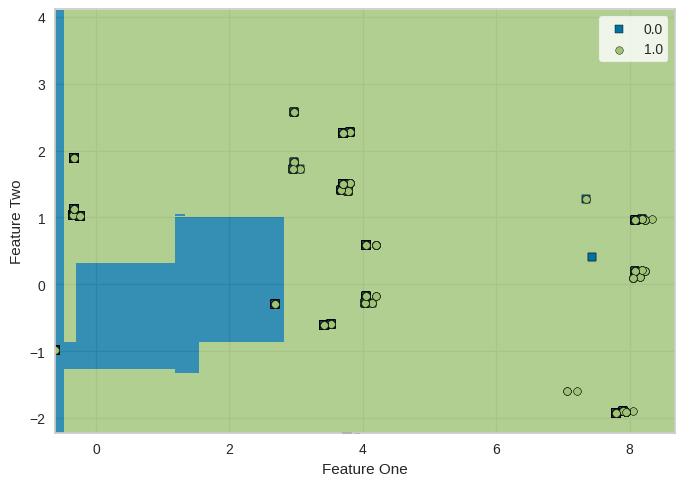

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'boundary')

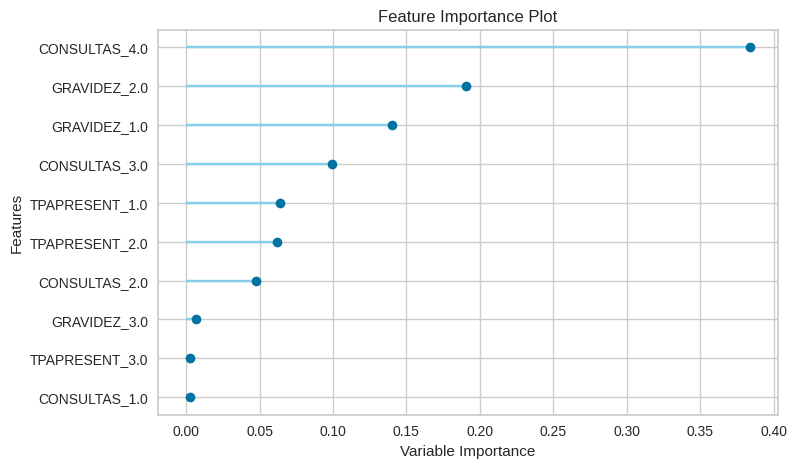

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'feature')

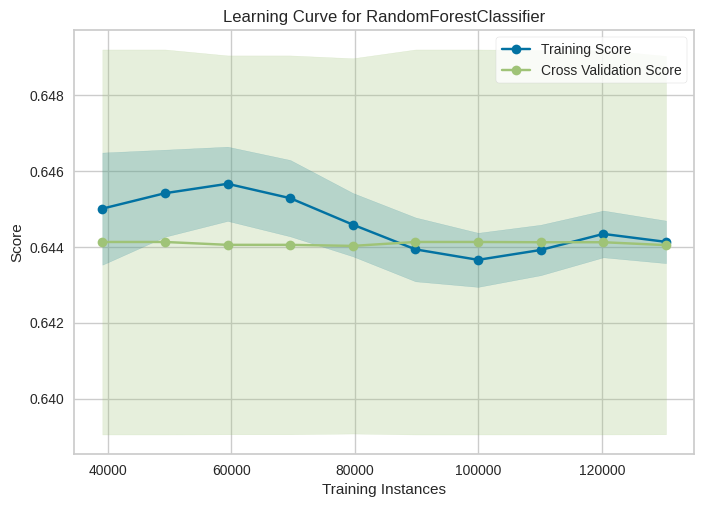

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_fold_tree_model, plot = 'learning')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rf_testing_pred = predict_model(rf_fold_tree_model, data = sinasc_balanceado2_test_selected)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6446,0.6636,0.5854,0.6622,0.6215,0.2890,0.2909


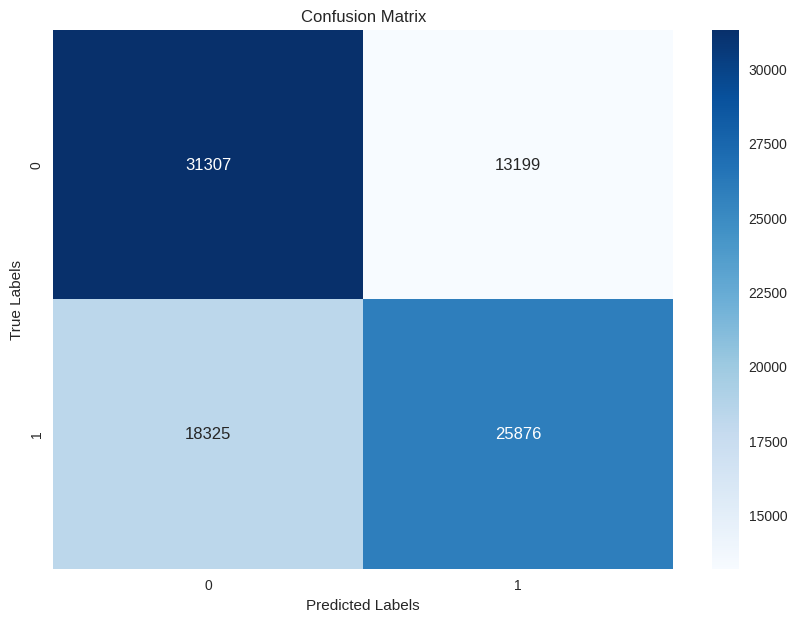

Accuracy: 0.644627819676012
Kappa: 0.2889646911052336
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67     44506
         1.0       0.66      0.59      0.62     44201

    accuracy                           0.64     88707
   macro avg       0.65      0.64      0.64     88707
weighted avg       0.65      0.64      0.64     88707



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = rf_testing_pred['PREMATURO']
predicted_labels = rf_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

## otimizando modelo Floresta Aleatória com balanceameto (não rodar)

In [ ]:
tuned_model = tune_model(rf_fold_tree_model, optimize="F1")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:06:34
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(tuned_model)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_samples_leaf=4,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


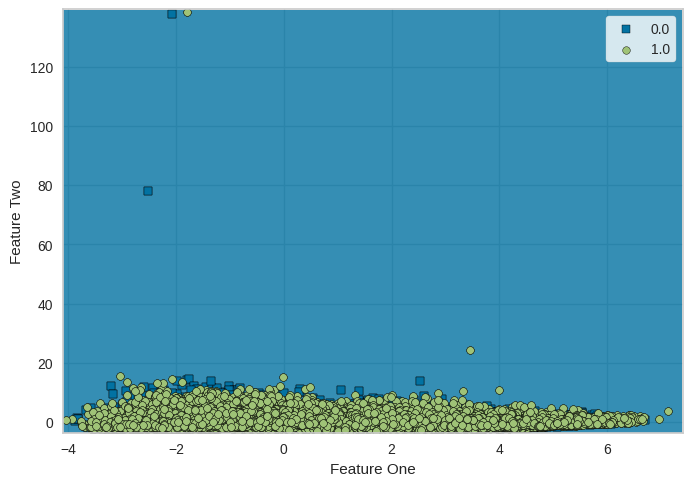

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_model, plot = 'boundary')

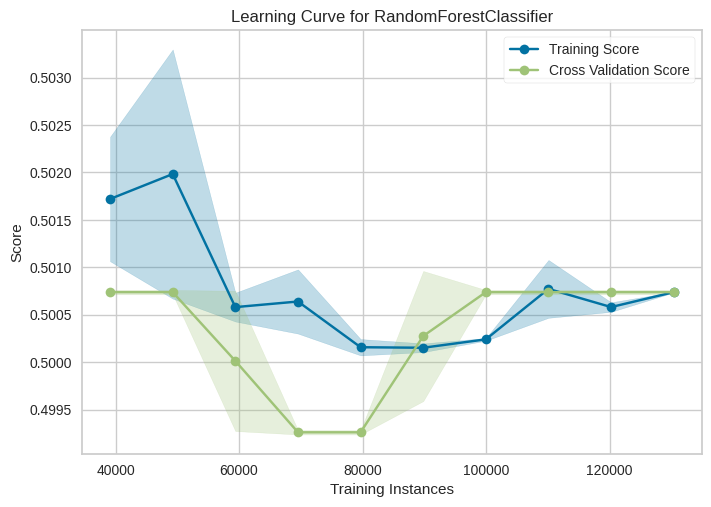

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_model, plot = 'learning')


In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rf_testing_pred = predict_model(tuned_model, data = sinasc_balanceado2_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4983,0.5000,1.0000,0.4983,0.6651,0.0000,0.0000


In [ ]:
# <> -----------------------------------
# <> Visualizando Cabeçalho do Data.Frame
rf_testing_pred.head(20)

,IDADEMAE,QTDGESTANT,CONSULTAS,MESPRENAT,GRAVIDEZ,PARTO,IDANOMAL,TPAPRESENT,PREMATURO,prediction_label,prediction_score
662494,29,1.0,4.0,3.0,1.0,2.0,2.0,1.0,0.0,1,0.5007
648632,23,0.0,4.0,2.0,1.0,1.0,2.0,1.0,0.0,1,0.5007
1039807,19,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1,0.5007
944030,23,2.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,1,0.5007
1262731,36,2.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1,0.5007
320979,17,0.0,4.0,1.0,1.0,2.0,2.0,1.0,0.0,1,0.5007
1009393,19,0.0,3.0,2.0,1.0,2.0,2.0,1.0,0.0,1,0.5007
1326931,36,3.0,4.0,2.0,1.0,2.0,2.0,1.0,1.0,1,0.5007
344645,21,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0.5007
25544,31,0.0,4.0,2.0,1.0,2.0,2.0,1.0,1.0,1,0.5007


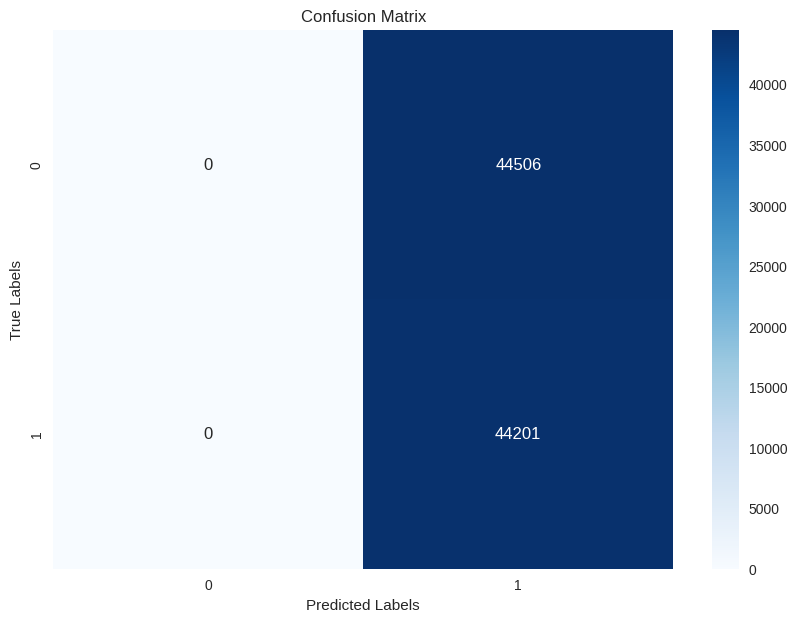

Accuracy: 0.4982808572040538
Kappa: 0.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     44506
         1.0       0.50      1.00      0.67     44201

    accuracy                           0.50     88707
   macro avg       0.25      0.50      0.33     88707
weighted avg       0.25      0.50      0.33     88707



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = rf_testing_pred['PREMATURO']
predicted_labels = rf_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

##3.4 - Modelo Árvore de Decisão com balanceamento

- Além de balancear os dados, vamos levar em consideração as variáveis mais importantes

In [ ]:
sinasc_balanceado2_train_selected = sinasc_balanceado2_train[[
                                                     "CONSULTAS",
                                                     "GRAVIDEZ",
                                                     "TPAPRESENT",
                                                    "PREMATURO"]]


sinasc_balanceado2_test_selected = sinasc_balanceado2_test[[
                                                     "CONSULTAS",
                                                     "GRAVIDEZ",
                                                     "TPAPRESENT",
                                                    "PREMATURO"]]


In [ ]:
# <> Iniciando  a configuração do modelo
# <> e informando a variável resposta
# <> session_id => para reprodutibilidade

clf = setup(data = sinasc_balanceado2_train_selected,
            target = 'PREMATURO',
            session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,PREMATURO
2,Target type,Binary
3,Original data shape,"(206983, 4)"
4,Transformed data shape,"(206983, 14)"
5,Transformed train set shape,"(144888, 14)"
6,Transformed test set shape,"(62095, 14)"
7,Categorical features,3
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# <> -----------------------------
# <> Criação do Modelo com Árvore de Decisão

decision_tree_model = create_model('dt', max_depth = 10, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6414,0.6603,0.5773,0.6630,0.6172,0.2830,0.2854
1,0.6425,0.6615,0.5786,0.6641,0.6184,0.2850,0.2874
2,0.6499,0.6690,0.5889,0.6715,0.6275,0.2999,0.3022
3,0.6444,0.6631,0.5824,0.6656,0.6212,0.2889,0.2912
4,0.6511,0.6698,0.5913,0.6724,0.6293,0.3023,0.3046
Mean,0.6458,0.6647,0.5837,0.6673,0.6227,0.2918,0.2941
Std,0.0039,0.0039,0.0055,0.0039,0.0048,0.0079,0.0078


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(decision_tree_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=12345, splitter='best')


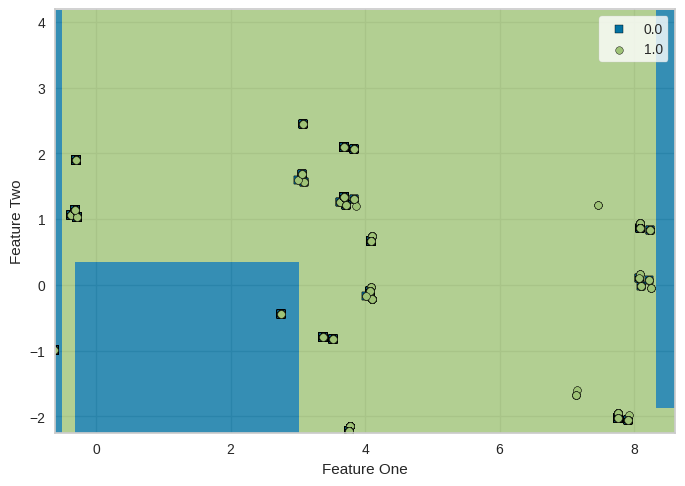

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(decision_tree_model, plot = 'boundary')

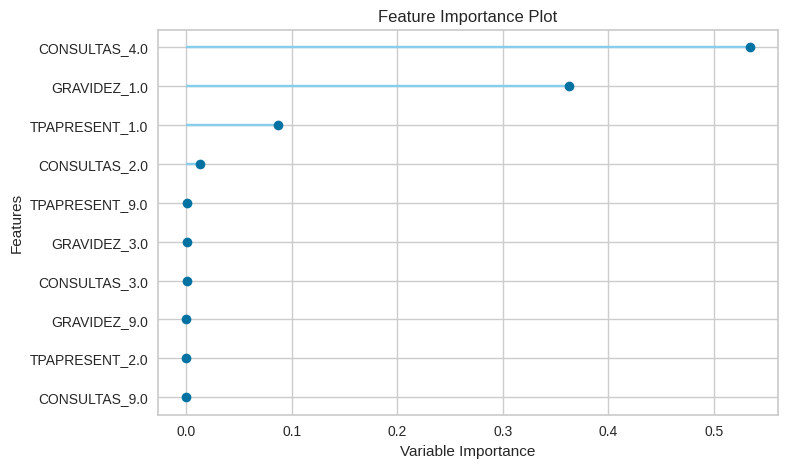

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(decision_tree_model, plot = 'feature')

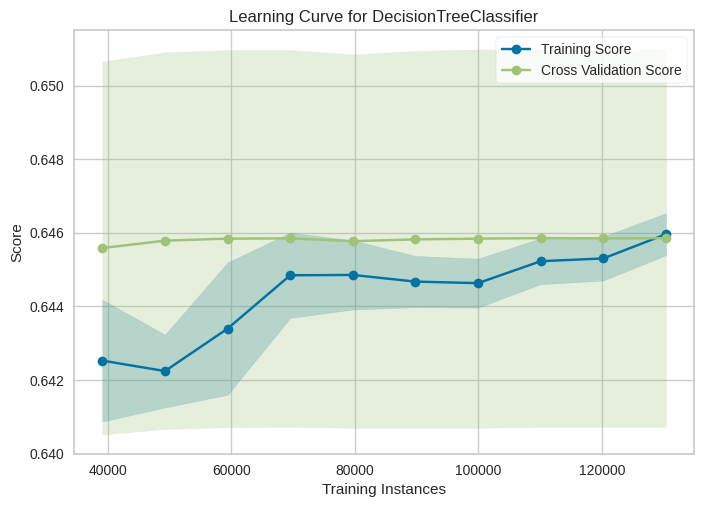

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(decision_tree_model, plot = 'learning')

IndexError: index 5 is out of bounds for axis 0 with size 4

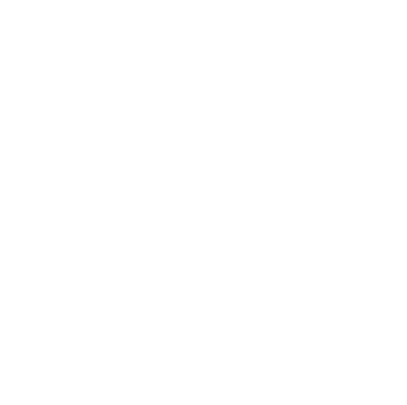

In [ ]:
# <> ------------------------------------------------------------
# <> Plotar a árvore de decisão

plt.figure(figsize=(5,5))
plot_tree(decision_tree_model, filled=True, feature_names = sinasc_balanceado2_train_selected.columns,
          class_names=['Prematuro', 'Não Prematuro'])

In [ ]:
# <> -----------------------------
# <> Otimizar o modelo
tuned_dt = tune_model(decision_tree_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6457,0.6650,0.5797,0.6686,0.6210,0.2915,0.2941
1,0.6372,0.6557,0.5759,0.6571,0.6138,0.2745,0.2766
2,0.6454,0.6637,0.5821,0.6672,0.6218,0.2909,0.2933
3,0.6396,0.6589,0.5752,0.6610,0.6151,0.2793,0.2817
4,0.6544,0.6739,0.5946,0.6761,0.6327,0.3088,0.3111
5,0.6455,0.6642,0.5835,0.6669,0.6224,0.2912,0.2935
6,0.6417,0.6602,0.5779,0.6631,0.6176,0.2835,0.2858
7,0.6471,0.6659,0.5867,0.6682,0.6248,0.2944,0.2966
8,0.6505,0.6685,0.5853,0.6740,0.6265,0.3012,0.3039


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=12345, splitter='best')


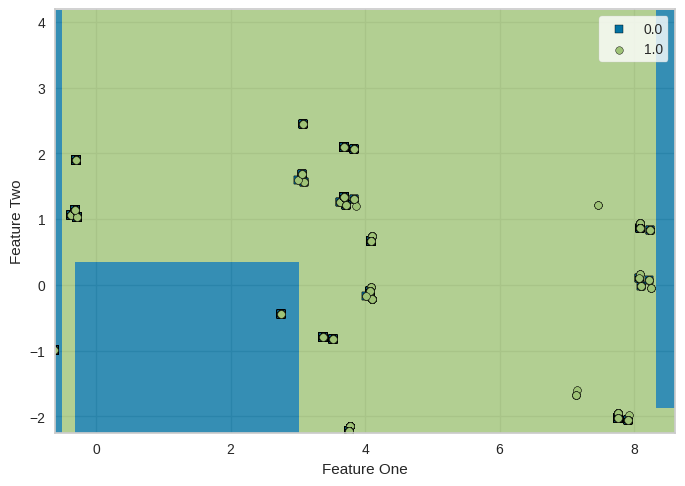

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_dt, plot = 'boundary')

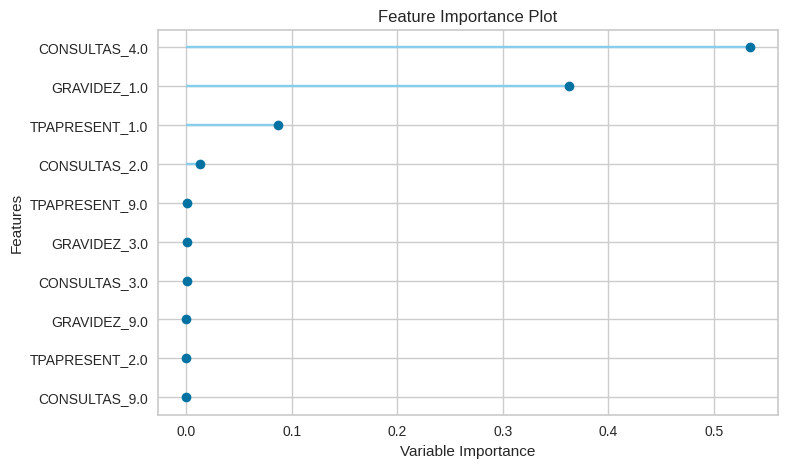

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_dt, plot = 'feature')

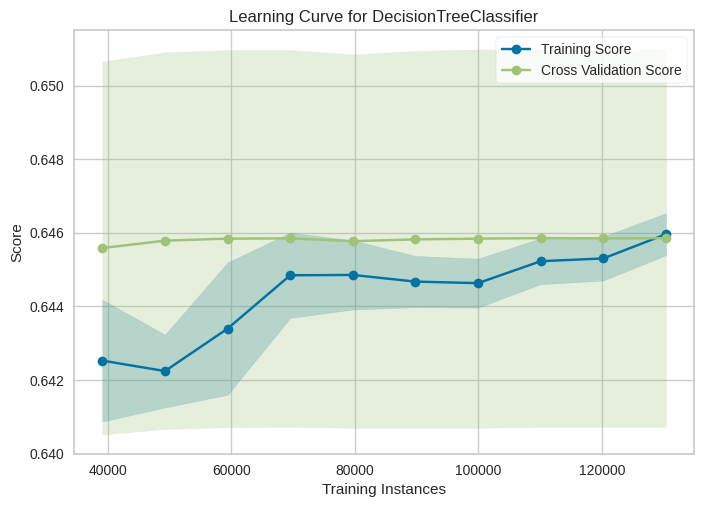

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(tuned_dt, plot = 'learning')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
dt_testing_pred = predict_model(tuned_dt, data = sinasc_balanceado2_test_selected)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6446,0.6635,0.5853,0.6622,0.6214,0.2889,0.2909


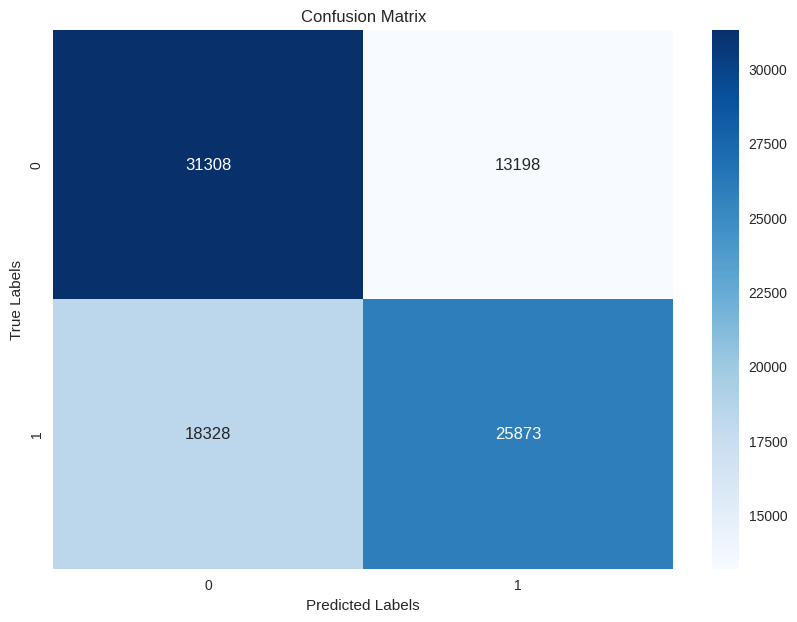

Accuracy: 0.6446052735409833
Kappa: 0.2889193597940447
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67     44506
         1.0       0.66      0.59      0.62     44201

    accuracy                           0.64     88707
   macro avg       0.65      0.64      0.64     88707
weighted avg       0.65      0.64      0.64     88707



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = dt_testing_pred['PREMATURO']
predicted_labels = dt_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)
